<a href="https://colab.research.google.com/github/samirp92/Final-Year-Project-Time-Series-Forecasting-/blob/LSTM/LSTM_Best_Optimizer_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hourly resampled data

In [ ]:
# Resampled the data
hourly_resampled = df_imputed.resample('H').mean()

## EDA

In [ ]:
# Define a function to plot the visualization, distribution and correlation of resampled data
def df_visu_dist_corr(dataset, resample_type, title):

  # Resample the data
  df_resampled = dataset.resample(resample_type).mean()

  print('Shape after %s resampling of data : %s ' %(title, df_resampled.shape))

  # Plot Resampled Data set
  df_resampled.plot(subplots=True, figsize=(30,20))
  plt.suptitle("Visualization of %s resampled Data" %title, fontsize=30, color='blue')
  plt.tight_layout(rect=[0, 0, 1, 0.96])
  plt.show()

  # Plot distribution
  print(' \n\n************************************************ %s Resampled distribution Plot **************************************************' %title, end="\n\n")
  df_resampled.hist(figsize=(15, 10), bins=50)
  plt.tight_layout(rect=[0, 0, 1, 0.96])
  plt.gcf().set_dpi(300)
  plt.show()

  # Plot correlation plot
  print(' \n\n************************************************ Correlation Plot for %s Resampled Data **************************************************' %title, end="\n\n")
  plt.figure(figsize=(10,6))
  sns.heatmap(df_imputed.corr(), annot=True, cmap='coolwarm', fmt='.2f')
  plt.tight_layout(rect=[0, 0, 1, 0.96])
  plt.gcf().set_dpi(200)
  plt.show()

Shape after Hourly resampling of data : (34589, 8) 


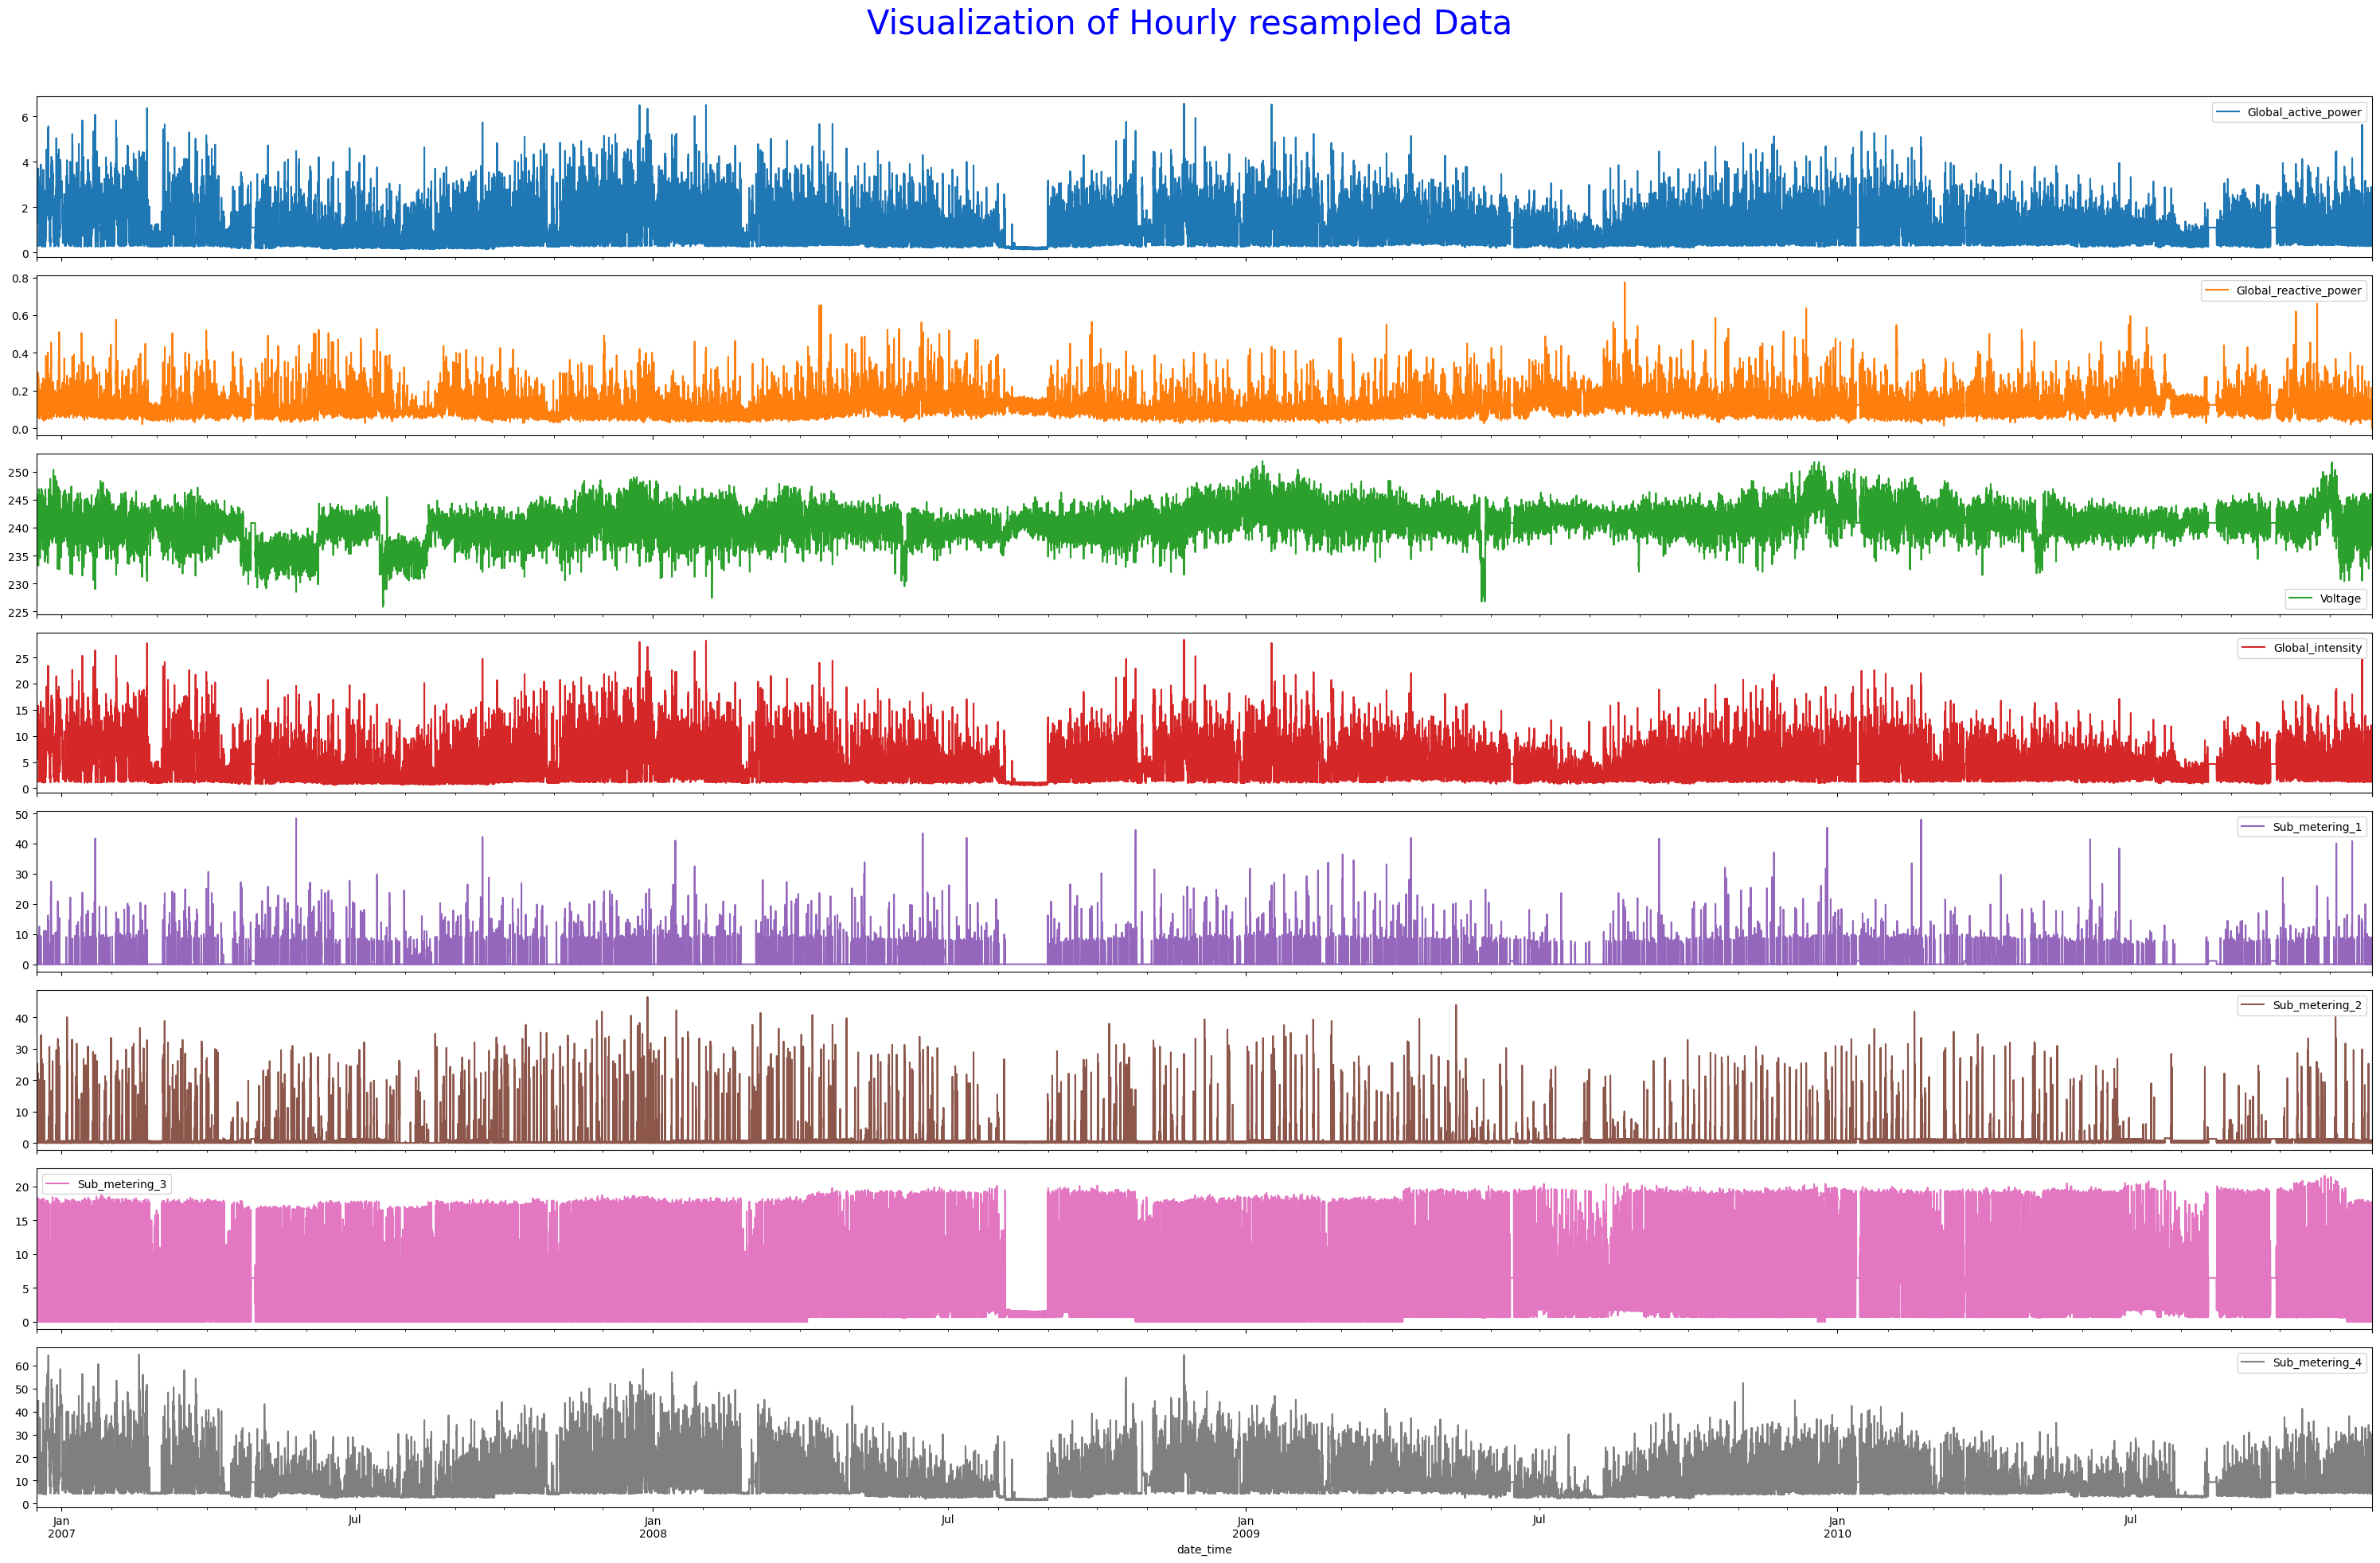

 

************************************************ Hourly Resampled distribution Plot **************************************************



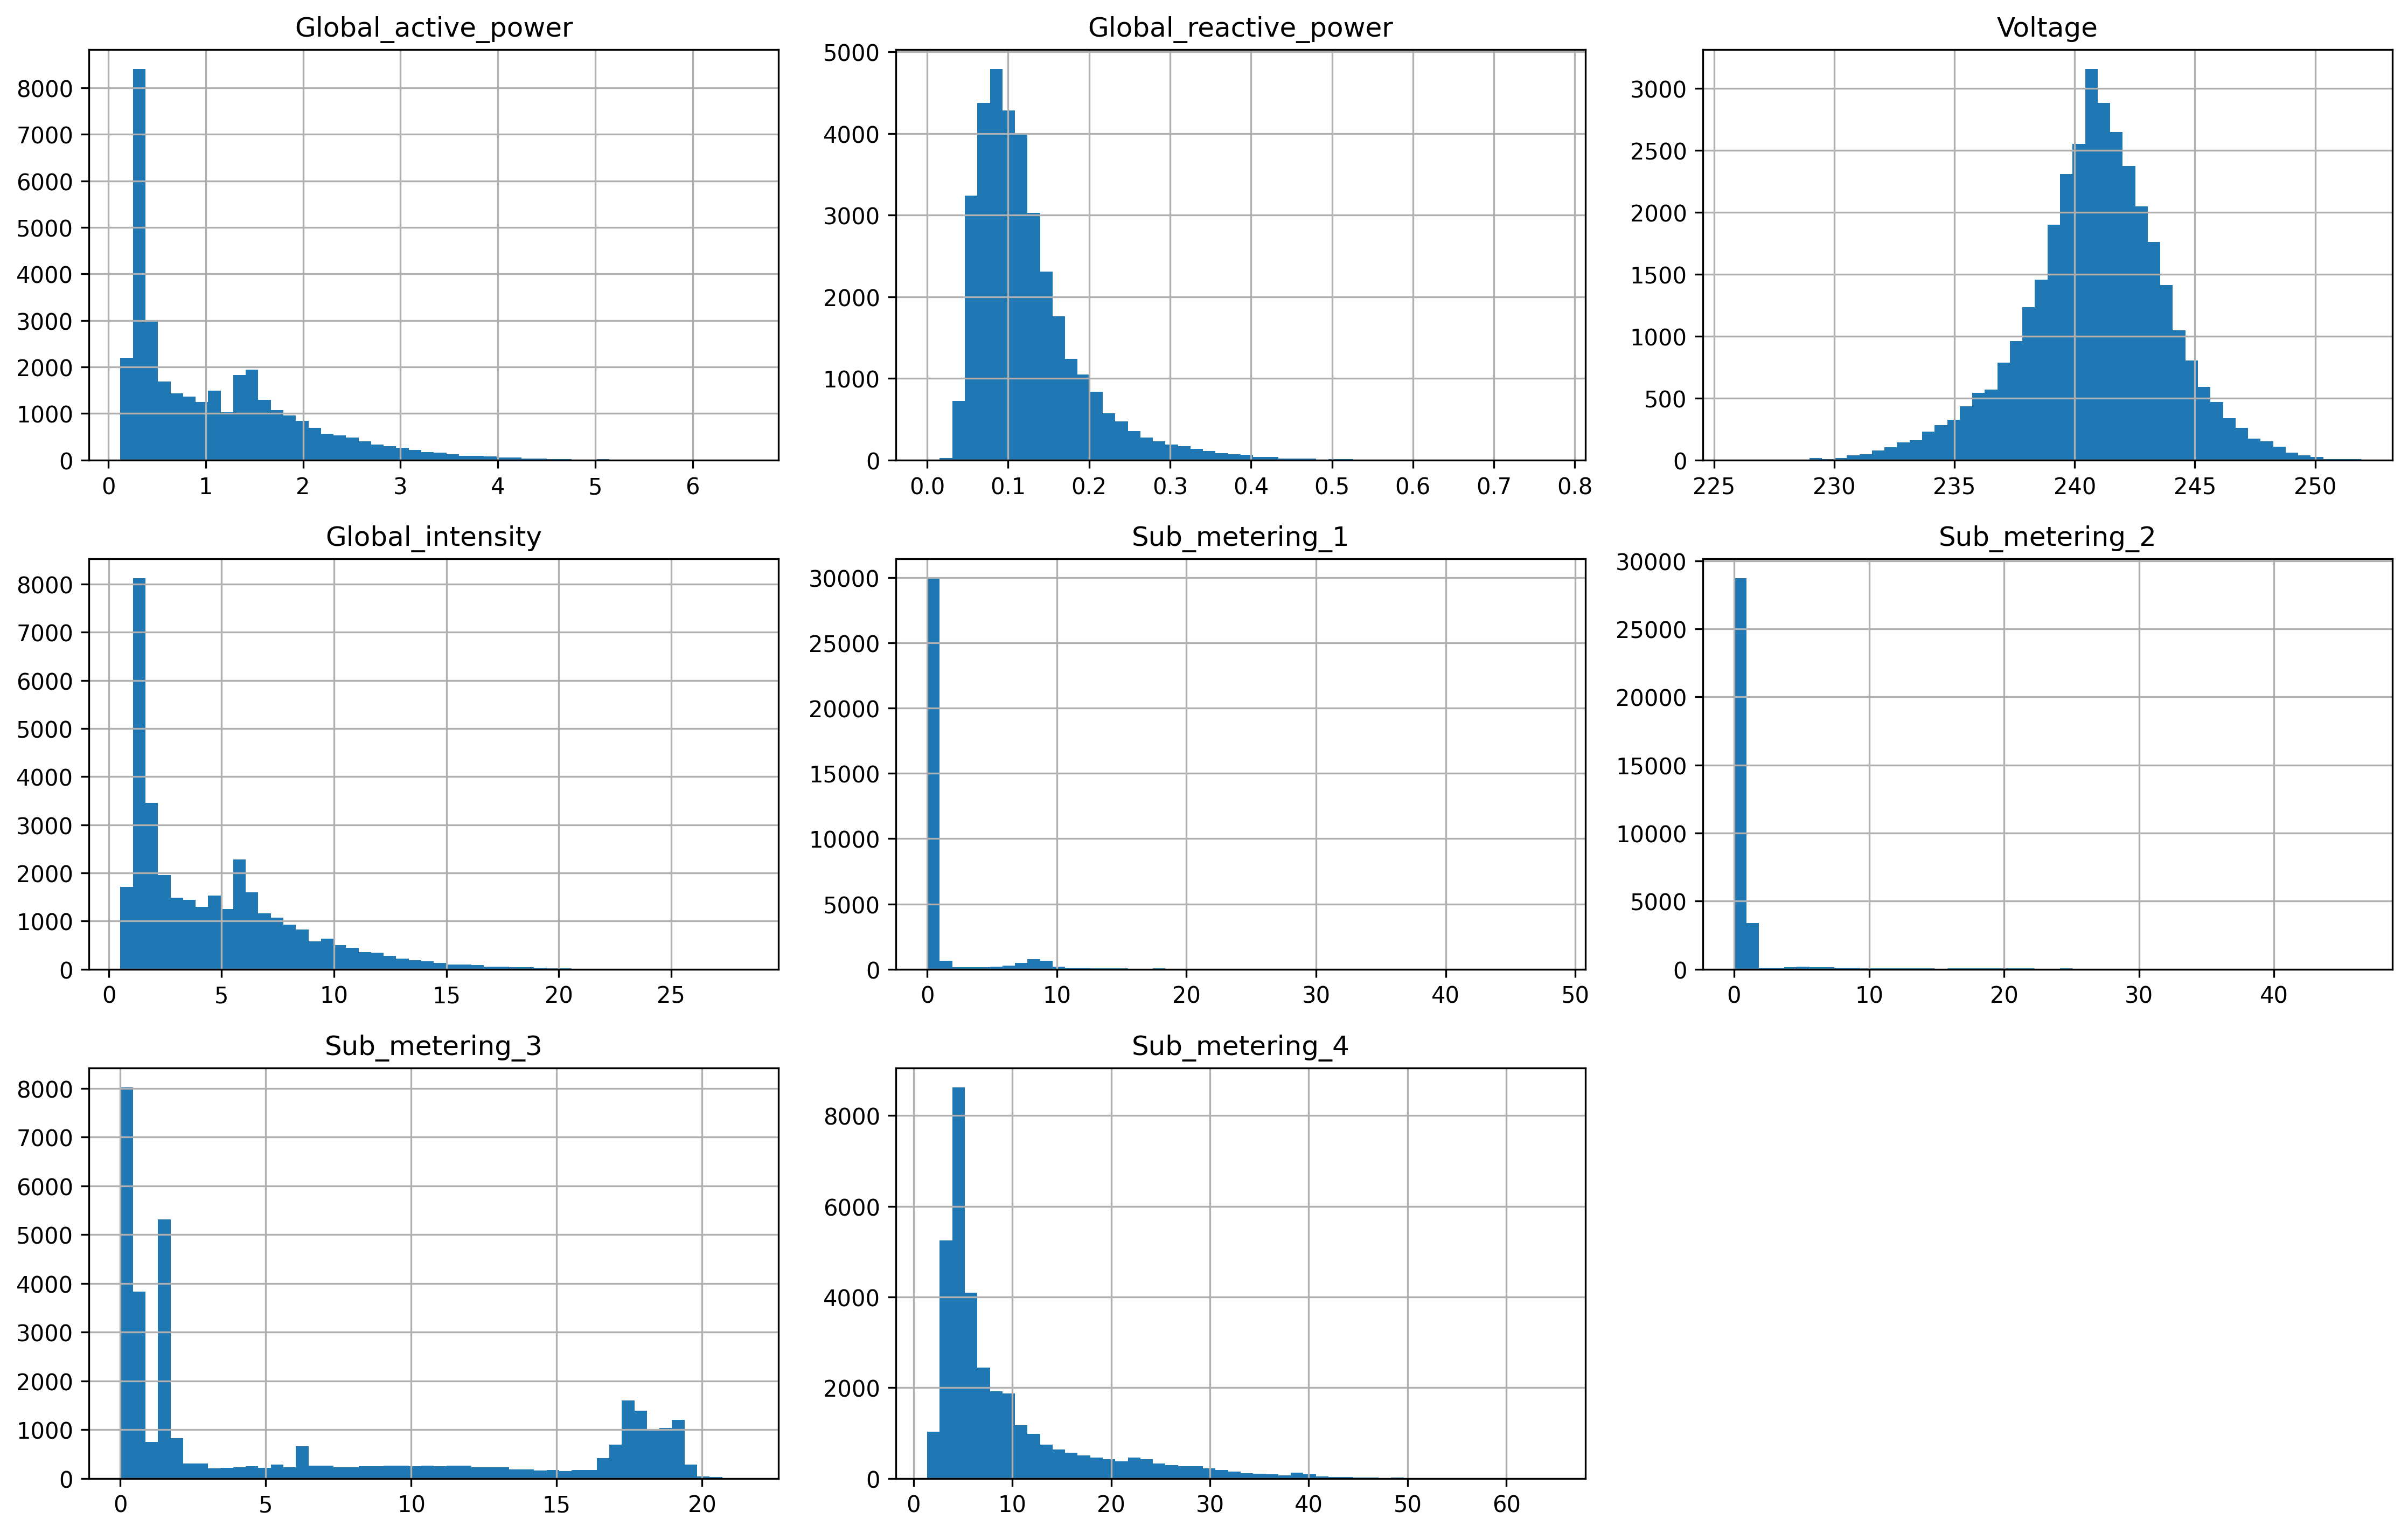

 

************************************************ Correlation Plot for Hourly Resampled Data **************************************************



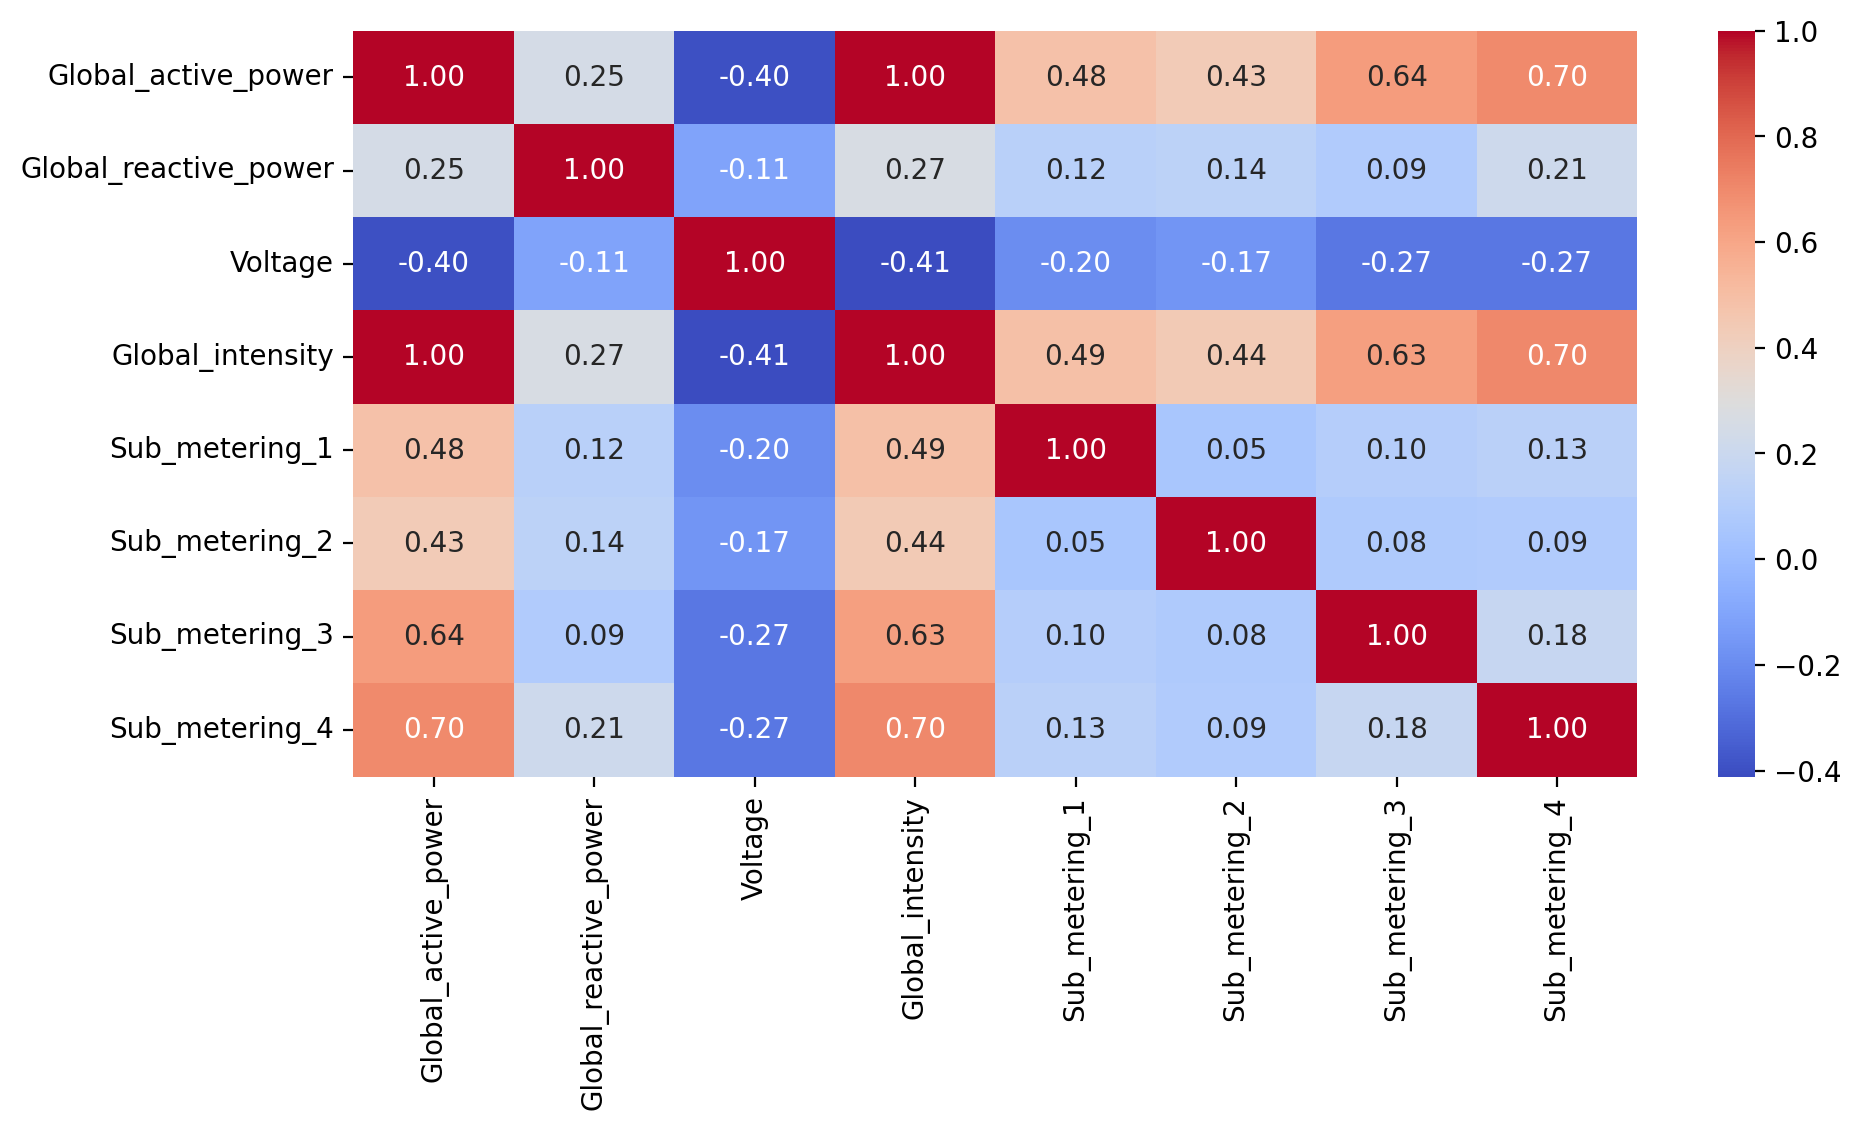

In [ ]:
# Plot the visualization, distribution and correlation of Hourly resampled data
df_visu_dist_corr(df_imputed, "H", "Hourly")

Note:- As Global_intensity is highly correlated with Global_active_power so I am removing Global_intensity column

In [ ]:
df1 = hourly_resampled.drop(['Global_intensity','Sub_metering_4'], axis=1)
df1

Global_active_power  Global_reactive_power     Voltage  \
date_time                                                                     
2006-12-16 17:00:00             4.222889               0.229000  234.643889   
2006-12-16 18:00:00             3.632200               0.080033  234.580167   
2006-12-16 19:00:00             3.400233               0.085233  233.232500   
2006-12-16 20:00:00             3.268567               0.075100  234.071500   
2006-12-16 21:00:00             3.056467               0.076667  237.158667   
...                                  ...                    ...         ...   
2010-11-26 17:00:00             1.725900               0.061400  237.069667   
2010-11-26 18:00:00             1.573467               0.053700  237.531833   
2010-11-26 19:00:00             1.659333               0.060033  236.741000   
2010-11-26 20:00:00             1.163700               0.061167  239.396000   
2010-11-26 21:00:00             0.934667               0.000000  239.690000   

                     Sub_metering_1  Sub_metering_2  Sub_metering_3  
date_time                                                            
2006-12-16 17:00:00             0.0        0.527778       16.861111  
2006-12-16 18:00:00             0.0        6.716667       16.866667  
2006-12-16 19:00:00             0.0        1.433333       16.683333  
2006-12-16 20:00:00             0.0        0.000000       16.783333  
2006-12-16 21:00:00             0.0        0.416667       17.216667  
...                             ...             ...             ...  
2010-11-26 17:00:00             0.0        0.000000       12.866667  
2010-11-26 18:00:00             0.0        0.000000        0.000000  
2010-11-26 19:00:00             0.0        0.066667        0.000000  
2010-11-26 20:00:00             0.0        1.066667        0.000000  
2010-11-26 21:00:00             0.0        0.000000        0.000000  

[34589 rows x 6 columns]

## Data Normalization

In [ ]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_df = scaler.fit_transform(df1)

# Shape of scaled data
scaled_df

array([[0.63681623, 0.29573827, 0.33794529, 0.        , 0.01136636,
        0.78241815],
       [0.54504495, 0.10335773, 0.33550078, 0.        , 0.14465183,
        0.78267595],
       [0.50900588, 0.11007318, 0.28380167, 0.        , 0.03086863,
        0.7741686 ],
       ...,
       [0.2385342 , 0.07752906, 0.41839455, 0.        , 0.00143575,
        0.        ],
       [0.16153105, 0.07899268, 0.52024552, 0.        , 0.022972  ,
        0.        ],
       [0.12594772, 0.        , 0.53152393, 0.        , 0.        ,
        0.        ]])

## LSTM-1 optimizer=Adam epochs=50 batch_size=32 seq=24

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100)                 │          42,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,901 (167.58 KB)

 Trainable params: 42,901 (167.58 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
757/757 - 10s - 14ms/step - loss: 0.0127 - val_loss: 0.0085
Epoch 2/50
757/757 - 3s - 4ms/step - loss: 0.0095 - val_loss: 0.0080
Epoch 3/50
757/757 - 4s - 6ms/step - loss: 0.0089 - val_loss: 0.0077
Epoch 4/50
757/757 - 5s - 7ms/step - loss: 0.0085 - val_loss: 0.0073
Epoch 5/50
757/757 - 4s - 6ms/step - loss: 0.0083 - val_loss: 0.0071
Epoch 6/50
757/757 - 6s - 8ms/step - loss: 0.0081 - val_loss: 0.0070
Epoch 7/50
757/757 - 4s - 6ms/step - loss: 0.0080 - val_loss: 0.0069
Epoch 8/50
757/757 - 5s - 7ms/step - loss: 0.0079 - val_loss: 0.0068
Epoch 9/50
757/757 - 9s - 12ms/step - loss: 0.0079 - val_loss: 0.0067
Epoch 10/50
757/757 - 4s - 5ms/step - loss: 0.0078 - val_loss: 0.0067
Epoch 11/50
757/757 - 5s - 6ms/step - loss: 0.0077 - val_loss: 0.0066


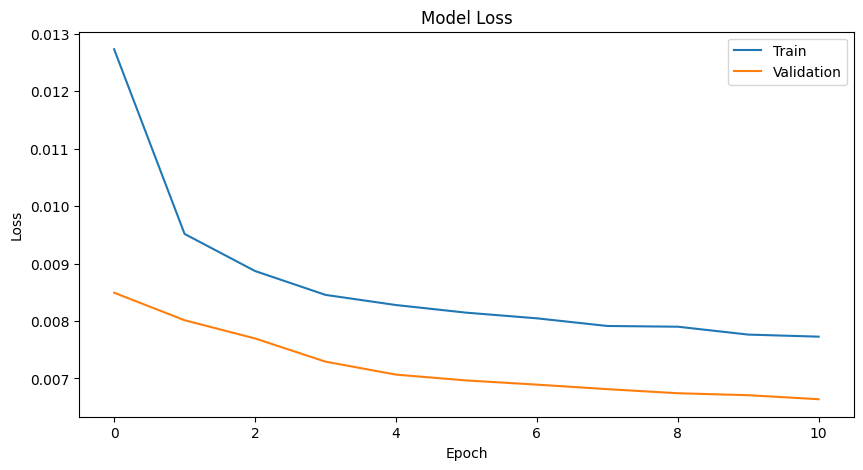

757/757 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Train Mean Absolute Error: 0.39644904899460914
Train Mean Squared Error: 0.3288307975417009
Train Root Mean Squared Error: 0.5734377015349627

Test Mean Absolute Error: 0.369198167010567
Test Mean Squared Error: 0.2750250483280812
Test Root Mean Squared Error: 0.5244283061850125


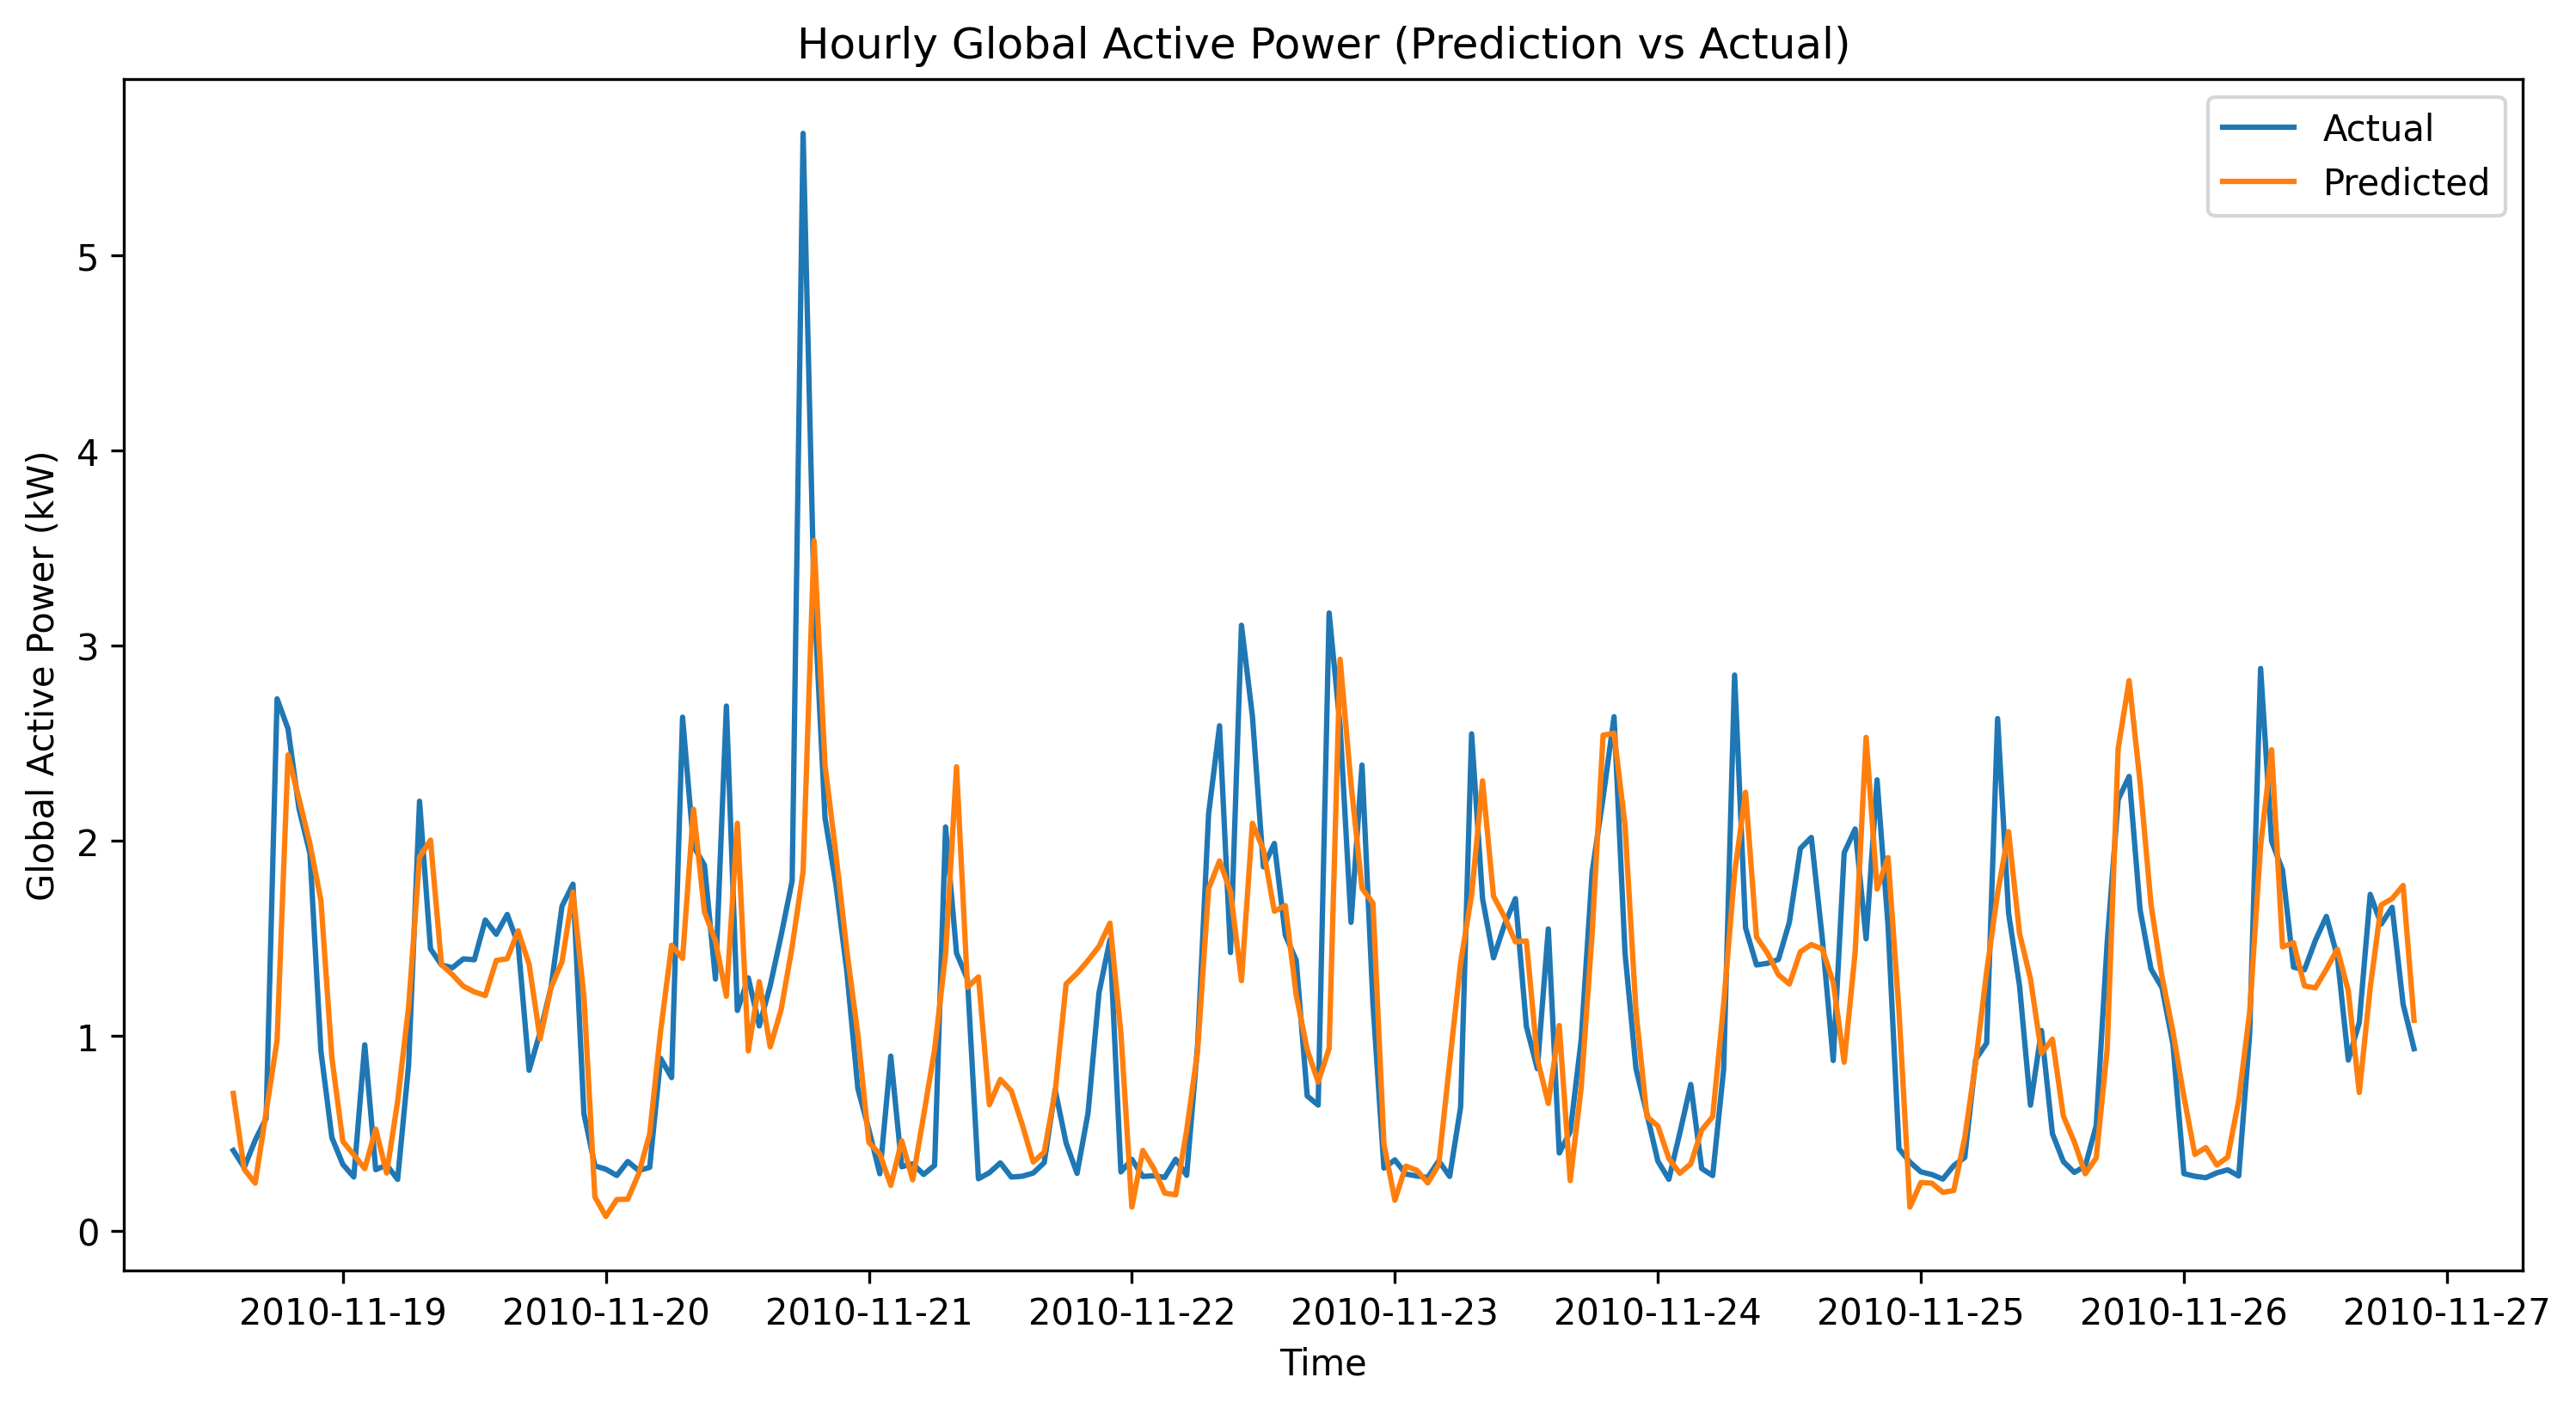

In [ ]:
# Define sequence length and features
sequence_length = 24             # Number of time steps to consider in each sequence
num_features = len(df1.columns)  # Number of features

# Create sequences and corresponding labels
sequences = []
labels = []
for i in range(len(scaled_df) - sequence_length):
    seq = scaled_df[i:i+sequence_length]
    label = scaled_df[i+sequence_length][0]  # 'Global_Active_Power' column index
    sequences.append(seq)
    labels.append(label)

# Convert to numpy arrays
sequences = np.array(sequences)
labels = np.array(labels)

# Split into train and test sets
train_size = int(0.7 * len(sequences))
X_train, X_test = sequences[:train_size], sequences[train_size:]
y_train, y_test = labels[:train_size], labels[train_size:]

# Check the shape of Train & Test Split
X_train.shape, y_train.shape, X_test.shape, y_test.shape

# Create the LSTM model
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Displaying a summary of the model
model.summary()

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10 , min_delta=0.005)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test),
                    verbose=2, shuffle=False, callbacks=[early_stopping])

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Predict train and test data using the trained model
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Perform inverse transformation to rescale back to original range
# y_true values for train data
train_y_copies = np.repeat(y_train.reshape(-1, 1), X_train.shape[-1], axis=-1)
true_train_y = scaler.inverse_transform(train_y_copies)[:,0]

# predicted values for train data
train_prediction_copies = np.repeat(train_predict, df1.shape[-1], axis=-1)
pred_train_y = scaler.inverse_transform(train_prediction_copies)[:,0]

# y_true values for test data
test_y_copies = np.repeat(y_test.reshape(-1, 1), X_test.shape[-1], axis=-1)
true_test_y = scaler.inverse_transform(test_y_copies)[:,0]

# predicted values for test data
test_prediction_copies = np.repeat(test_predict, df1.shape[-1], axis=-1)
pred_test_y = scaler.inverse_transform(test_prediction_copies)[:,0]

# Calculate evaluation metrics
print('Train Mean Absolute Error:', mean_absolute_error(true_train_y, pred_train_y))
print('Train Mean Squared Error:', mean_squared_error(true_train_y, pred_train_y))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(true_train_y, pred_train_y)))

print('\nTest Mean Absolute Error:', mean_absolute_error(true_test_y, pred_test_y))
print('Test Mean Squared Error:', mean_squared_error(true_test_y, pred_test_y))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(true_test_y, pred_test_y)))

# Plotting predicted and actual temperatures
plt.figure(figsize=(12, 6), dpi=300)
plt.plot(df1.index[-200:], true_test_y[-200:], label='Actual')
plt.plot(df1.index[-200:], pred_test_y[-200:], label='Predicted')
plt.title('Hourly Global Active Power (Prediction vs Actual)')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.show()

## LSTM-2 optimizer=SGD epochs=50 batch_size=32 seq=24

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                        │ (None, 100)                 │          42,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,901 (167.58 KB)

 Trainable params: 42,901 (167.58 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
757/757 - 5s - 6ms/step - loss: 0.0173 - val_loss: 0.0125
Epoch 2/50
757/757 - 4s - 5ms/step - loss: 0.0157 - val_loss: 0.0122
Epoch 3/50
757/757 - 6s - 8ms/step - loss: 0.0152 - val_loss: 0.0121
Epoch 4/50
757/757 - 4s - 5ms/step - loss: 0.0148 - val_loss: 0.0119
Epoch 5/50
757/757 - 3s - 4ms/step - loss: 0.0143 - val_loss: 0.0118
Epoch 6/50
757/757 - 5s - 7ms/step - loss: 0.0142 - val_loss: 0.0117


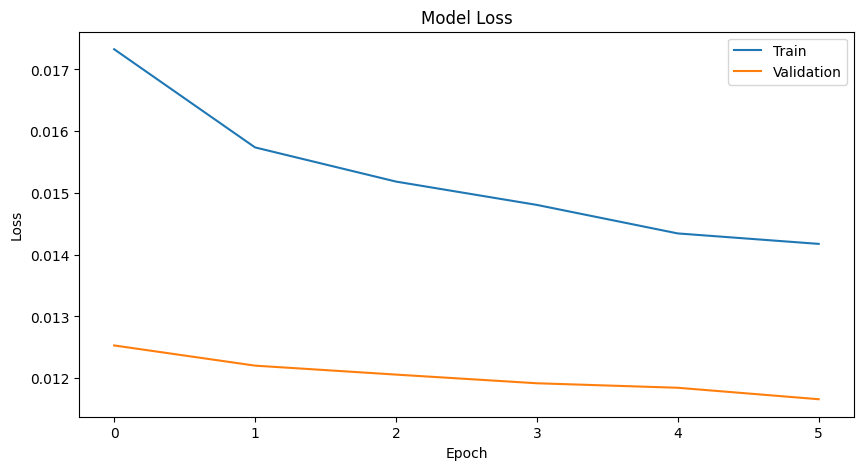

757/757 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Train Mean Absolute Error: 0.5826719421539225
Train Mean Squared Error: 0.6180066025266951
Train Root Mean Squared Error: 0.7861339596574461

Test Mean Absolute Error: 0.5135862583946291
Test Mean Squared Error: 0.48307701383551116
Test Root Mean Squared Error: 0.6950374190182218


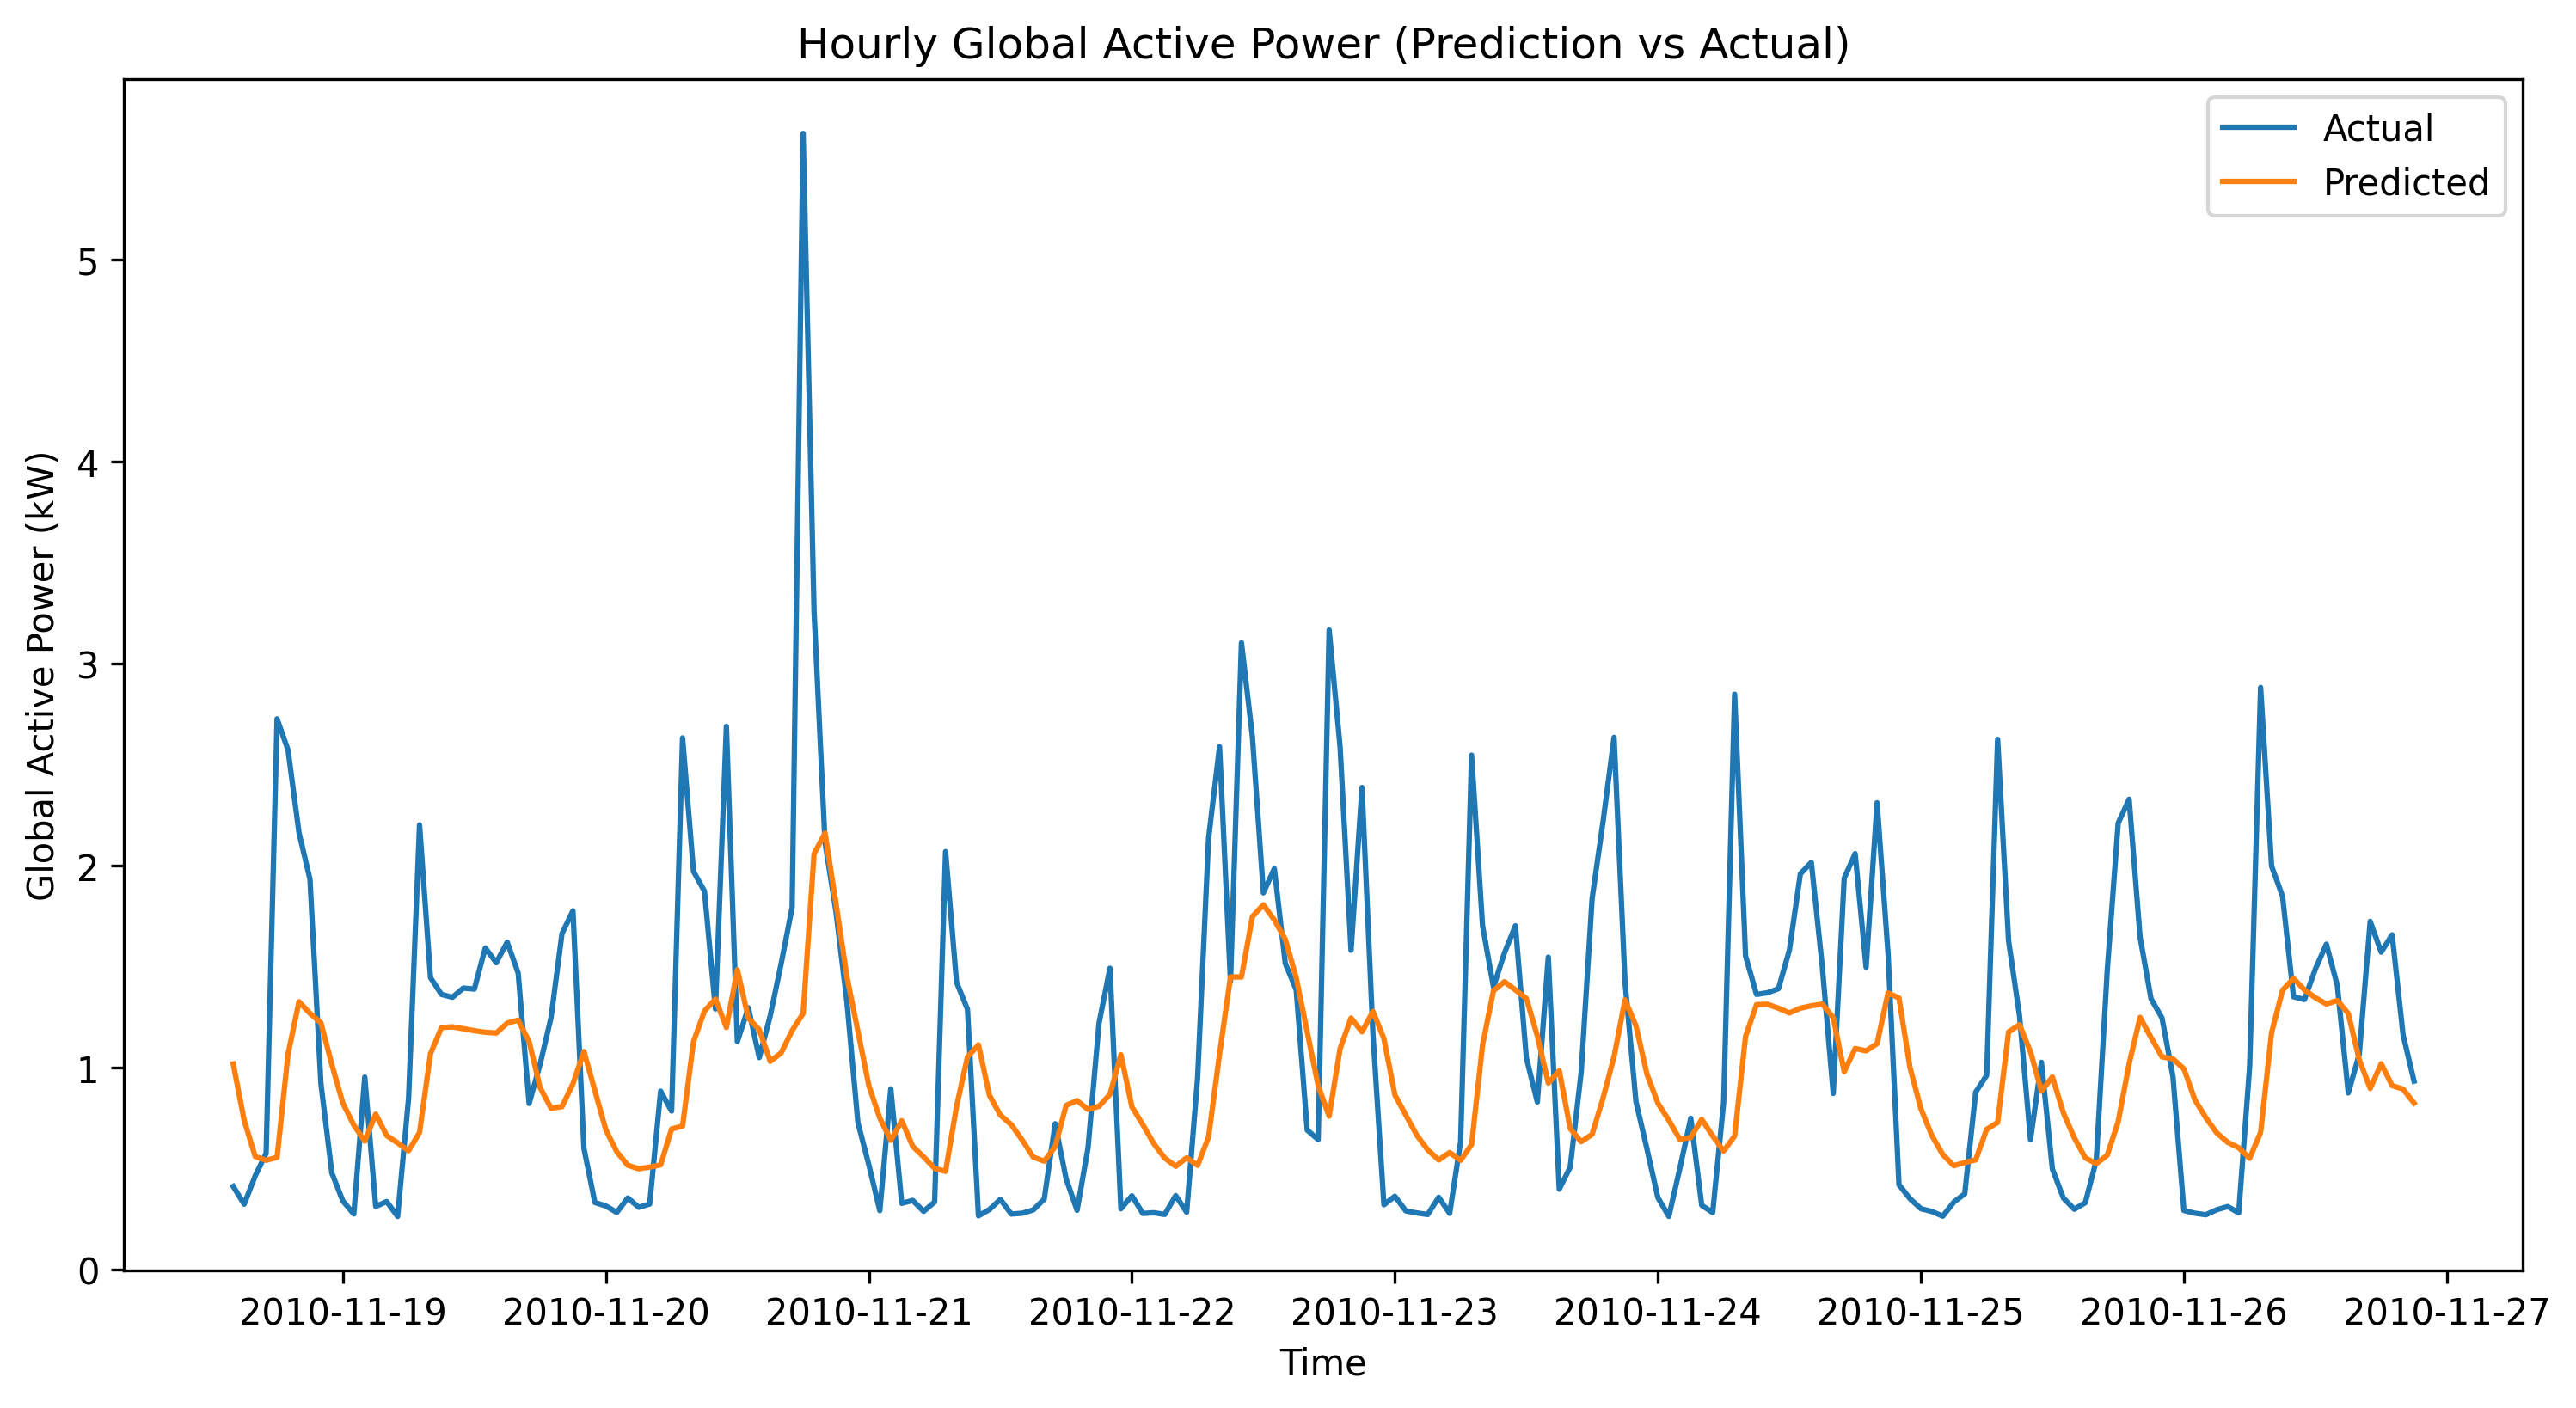

In [49]:
# Define sequence length and features
sequence_length = 24             # Number of time steps to consider in each sequence
num_features = len(df1.columns)  # Number of features

# Create sequences and corresponding labels
sequences = []
labels = []
for i in range(len(scaled_df) - sequence_length):
    seq = scaled_df[i:i+sequence_length]
    label = scaled_df[i+sequence_length][0]  # 'Global_Active_Power' column index
    sequences.append(seq)
    labels.append(label)

# Convert to numpy arrays
sequences = np.array(sequences)
labels = np.array(labels)

# Split into train and test sets
train_size = int(0.7 * len(sequences))
X_train, X_test = sequences[:train_size], sequences[train_size:]
y_train, y_test = labels[:train_size], labels[train_size:]

# Check the shape of Train & Test Split
X_train.shape, y_train.shape, X_test.shape, y_test.shape

# Create the LSTM model
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=SGD(), loss='mean_squared_error')

# Displaying a summary of the model
model.summary()

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5 , min_delta=0.005)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test),
                    verbose=2, shuffle=False, callbacks=[early_stopping])

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Predict train and test data using the trained model
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Perform inverse transformation to rescale back to original range
# y_true values for train data
train_y_copies = np.repeat(y_train.reshape(-1, 1), X_train.shape[-1], axis=-1)
true_train_y = scaler.inverse_transform(train_y_copies)[:,0]

# predicted values for train data
train_prediction_copies = np.repeat(train_predict, df1.shape[-1], axis=-1)
pred_train_y = scaler.inverse_transform(train_prediction_copies)[:,0]

# y_true values for test data
test_y_copies = np.repeat(y_test.reshape(-1, 1), X_test.shape[-1], axis=-1)
true_test_y = scaler.inverse_transform(test_y_copies)[:,0]

# predicted values for test data
test_prediction_copies = np.repeat(test_predict, df1.shape[-1], axis=-1)
pred_test_y = scaler.inverse_transform(test_prediction_copies)[:,0]

# Calculate evaluation metrics
print('Train Mean Absolute Error:', mean_absolute_error(true_train_y, pred_train_y))
print('Train Mean Squared Error:', mean_squared_error(true_train_y, pred_train_y))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(true_train_y, pred_train_y)))

print('\nTest Mean Absolute Error:', mean_absolute_error(true_test_y, pred_test_y))
print('Test Mean Squared Error:', mean_squared_error(true_test_y, pred_test_y))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(true_test_y, pred_test_y)))

# Plotting predicted and actual temperatures
plt.figure(figsize=(12, 6), dpi=300)
plt.plot(df1.index[-200:], true_test_y[-200:], label='Actual')
plt.plot(df1.index[-200:], pred_test_y[-200:], label='Predicted')
plt.title('Hourly Global Active Power (Prediction vs Actual)')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.show()

## LSTM-3 optimizer=RMSprop epochs=50 batch_size=32 seq=24

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                        │ (None, 100)                 │          43,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 43,301 (169.14 KB)

 Trainable params: 43,301 (169.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
757/757 - 5s - 7ms/step - loss: 0.0112 - val_loss: 0.0084
Epoch 2/50
757/757 - 4s - 5ms/step - loss: 0.0092 - val_loss: 0.0079
Epoch 3/50
757/757 - 3s - 4ms/step - loss: 0.0090 - val_loss: 0.0076
Epoch 4/50
757/757 - 6s - 8ms/step - loss: 0.0088 - val_loss: 0.0076
Epoch 5/50
757/757 - 4s - 5ms/step - loss: 0.0088 - val_loss: 0.0078
Epoch 6/50
757/757 - 4s - 5ms/step - loss: 0.0088 - val_loss: 0.0079


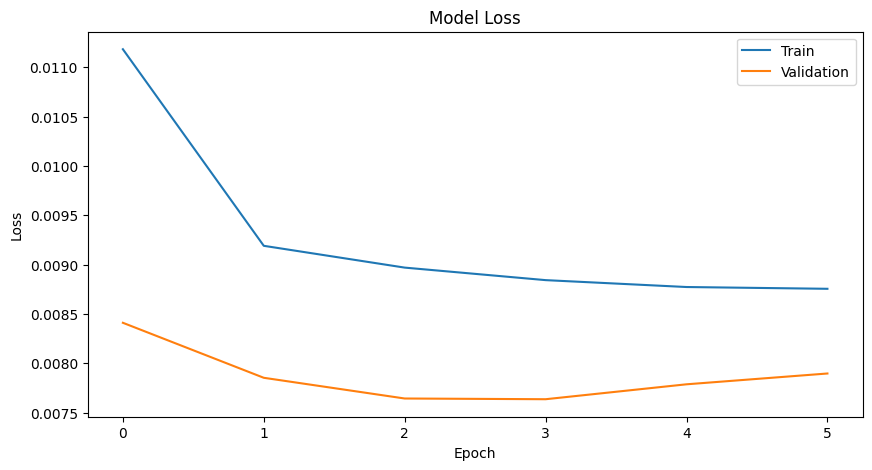

757/757 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Train Mean Absolute Error: 0.5005119510125794
Train Mean Squared Error: 0.405151441078325
Train Root Mean Squared Error: 0.6365150752954127

Test Mean Absolute Error: 0.4472486648275894
Test Mean Squared Error: 0.32716075016191276
Test Root Mean Squared Error: 0.5719796763539005


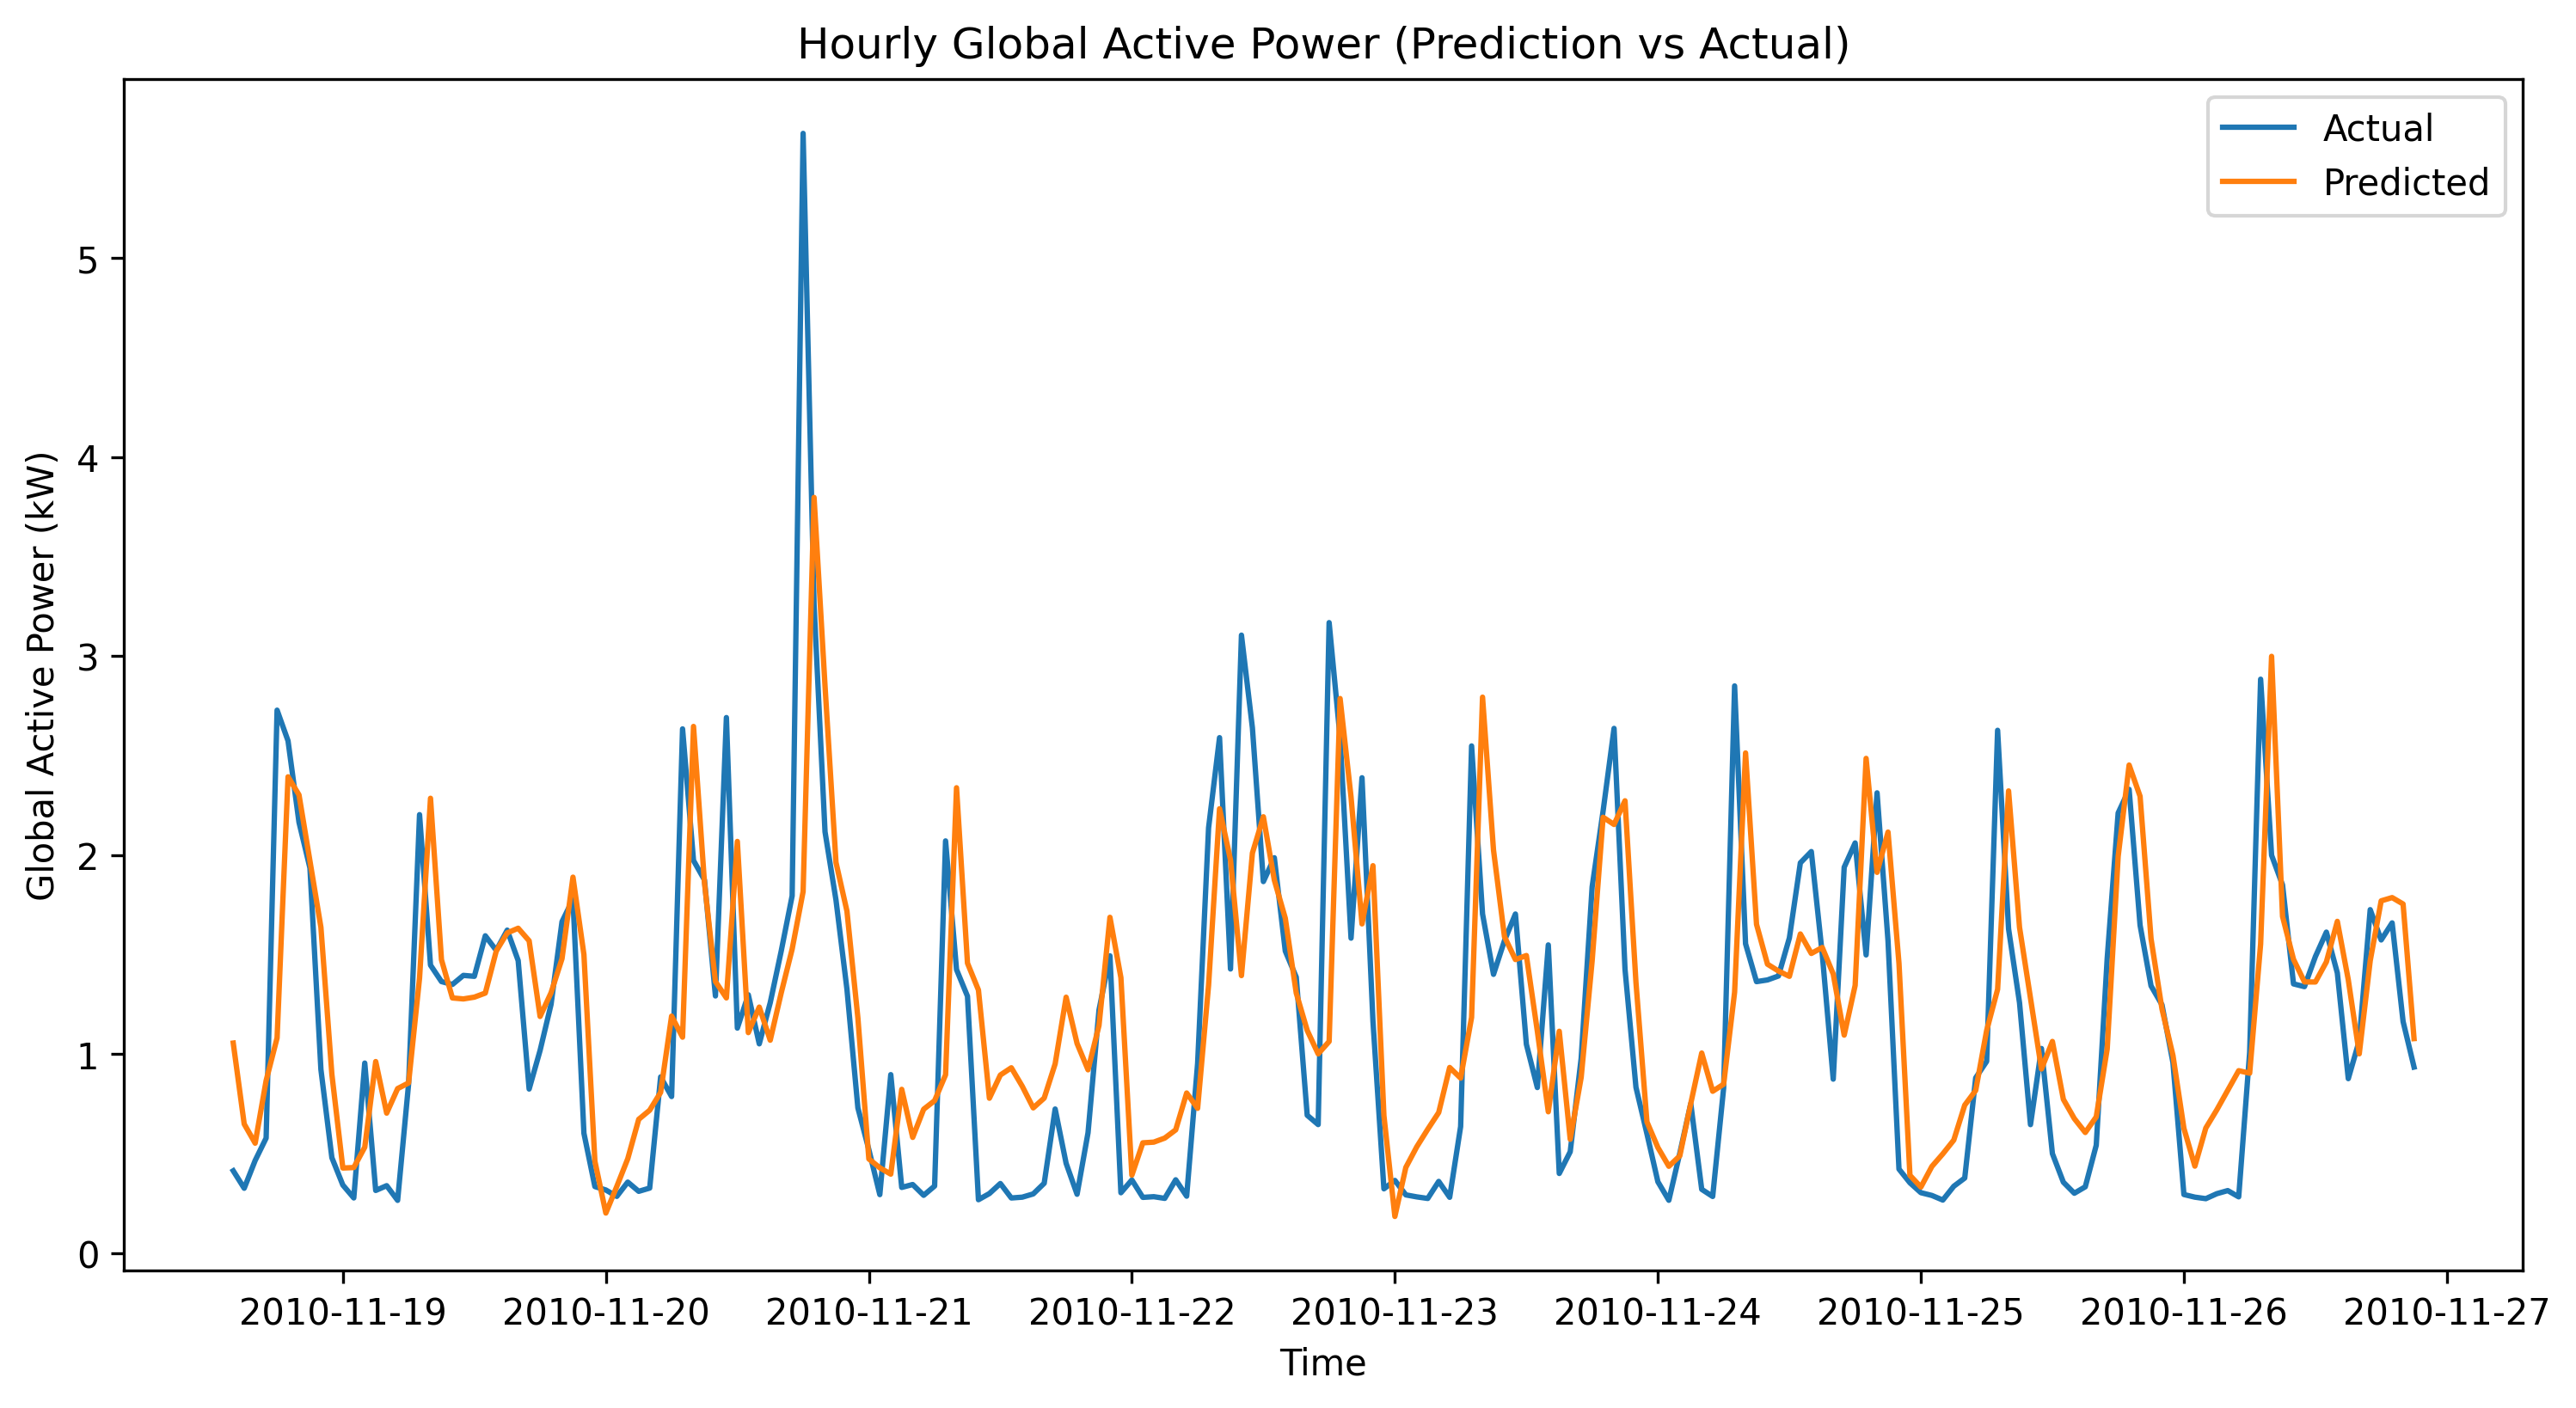

In [ ]:
# Define sequence length and features
sequence_length = 24             # Number of time steps to consider in each sequence
num_features = len(df1.columns)  # Number of features

# Create sequences and corresponding labels
sequences = []
labels = []
for i in range(len(scaled_df) - sequence_length):
    seq = scaled_df[i:i+sequence_length]
    label = scaled_df[i+sequence_length][0]  # 'Global_Active_Power' column index
    sequences.append(seq)
    labels.append(label)

# Convert to numpy arrays
sequences = np.array(sequences)
labels = np.array(labels)

# Split into train and test sets
train_size = int(0.7 * len(sequences))
X_train, X_test = sequences[:train_size], sequences[train_size:]
y_train, y_test = labels[:train_size], labels[train_size:]

# Check the shape of Train & Test Split
X_train.shape, y_train.shape, X_test.shape, y_test.shape

# Create the LSTM model
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=RMSprop(), loss='mean_squared_error')

# Displaying a summary of the model
model.summary()

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5 , min_delta=0.005)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test),
                    verbose=2, shuffle=False, callbacks=[early_stopping])

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Predict train and test data using the trained model
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Perform inverse transformation to rescale back to original range
# y_true values for train data
train_y_copies = np.repeat(y_train.reshape(-1, 1), X_train.shape[-1], axis=-1)
true_train_y = scaler.inverse_transform(train_y_copies)[:,0]

# predicted values for train data
train_prediction_copies = np.repeat(train_predict, df1.shape[-1], axis=-1)
pred_train_y = scaler.inverse_transform(train_prediction_copies)[:,0]

# y_true values for test data
test_y_copies = np.repeat(y_test.reshape(-1, 1), X_test.shape[-1], axis=-1)
true_test_y = scaler.inverse_transform(test_y_copies)[:,0]

# predicted values for test data
test_prediction_copies = np.repeat(test_predict, df1.shape[-1], axis=-1)
pred_test_y = scaler.inverse_transform(test_prediction_copies)[:,0]

# Calculate evaluation metrics
print('Train Mean Absolute Error:', mean_absolute_error(true_train_y, pred_train_y))
print('Train Mean Squared Error:', mean_squared_error(true_train_y, pred_train_y))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(true_train_y, pred_train_y)))

print('\nTest Mean Absolute Error:', mean_absolute_error(true_test_y, pred_test_y))
print('Test Mean Squared Error:', mean_squared_error(true_test_y, pred_test_y))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(true_test_y, pred_test_y)))

# Plotting predicted and actual temperatures
plt.figure(figsize=(12, 6), dpi=300)
plt.plot(df1.index[-200:], true_test_y[-200:], label='Actual')
plt.plot(df1.index[-200:], pred_test_y[-200:], label='Predicted')
plt.title('Hourly Global Active Power (Prediction vs Actual)')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.show()

<a href="https://colab.research.google.com/github/samirp92/Final-Year-Project-Time-Series-Forecasting-/blob/LSTM/LSTM_Best_Optimizer_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Daily resampled data

In [41]:
# Resampled the data
daily_resampled = df_imputed.resample('D').mean()

## EDA

In [42]:
# Define a function to plot the visualization, distribution and correlation of resampled data
def df_visu_dist_corr(dataset, resample_type, title):

  # Resample the data
  df_resampled = dataset.resample(resample_type).mean()

  print('Shape after %s resampling of data : %s ' %(title, df_resampled.shape))

  # Plot Resampled Data set
  df_resampled.plot(subplots=True, figsize=(30,20))
  plt.suptitle("Visualization of %s resampled Data" %title, fontsize=30, color='blue')
  plt.tight_layout(rect=[0, 0, 1, 0.96])
  plt.show()

  # Plot distribution
  print(' \n\n************************************************ %s Resampled distribution Plot **************************************************' %title, end="\n\n")
  df_resampled.hist(figsize=(15, 10), bins=50)
  plt.tight_layout(rect=[0, 0, 1, 0.96])
  plt.gcf().set_dpi(300)
  plt.show()

  # Plot correlation plot
  print(' \n\n************************************************ Correlation Plot for %s Resampled Data **************************************************' %title, end="\n\n")
  plt.figure(figsize=(10,6))
  sns.heatmap(df_imputed.corr(), annot=True, cmap='coolwarm', fmt='.2f')
  plt.tight_layout(rect=[0, 0, 1, 0.96])
  plt.gcf().set_dpi(200)
  plt.show()

Shape after Daily resampling of data : (1442, 8) 


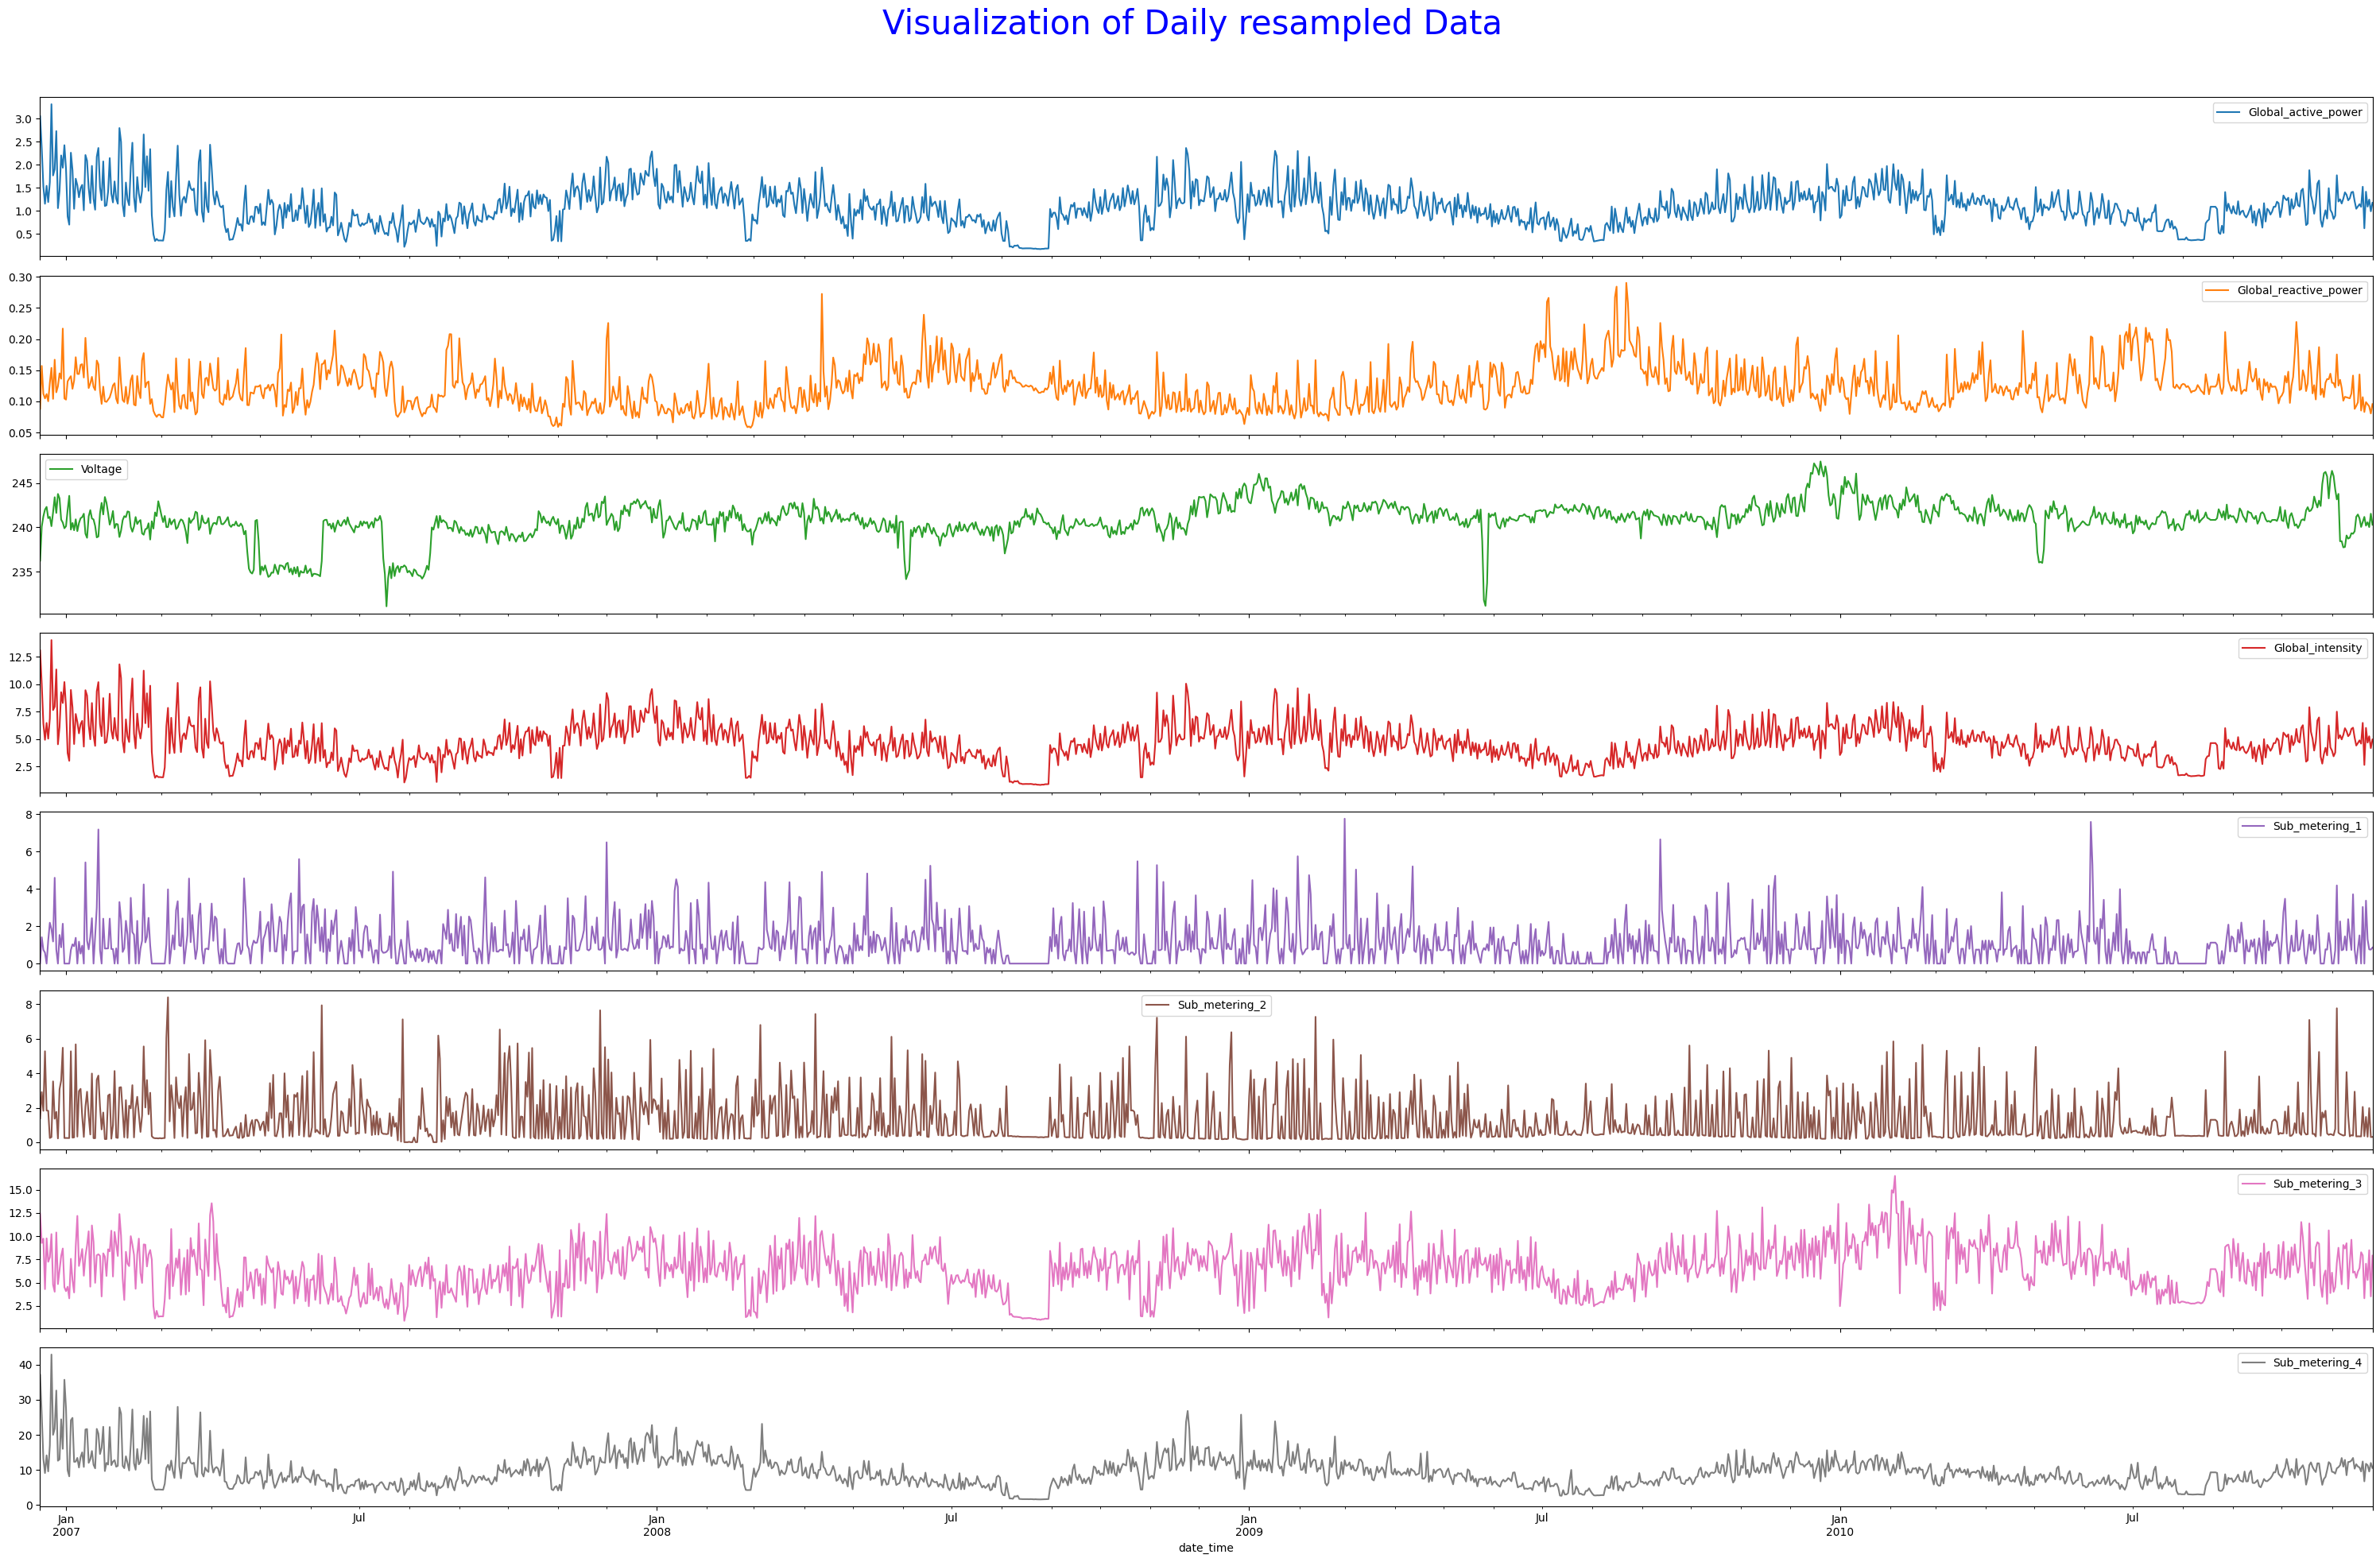

 

************************************************ Daily Resampled distribution Plot **************************************************



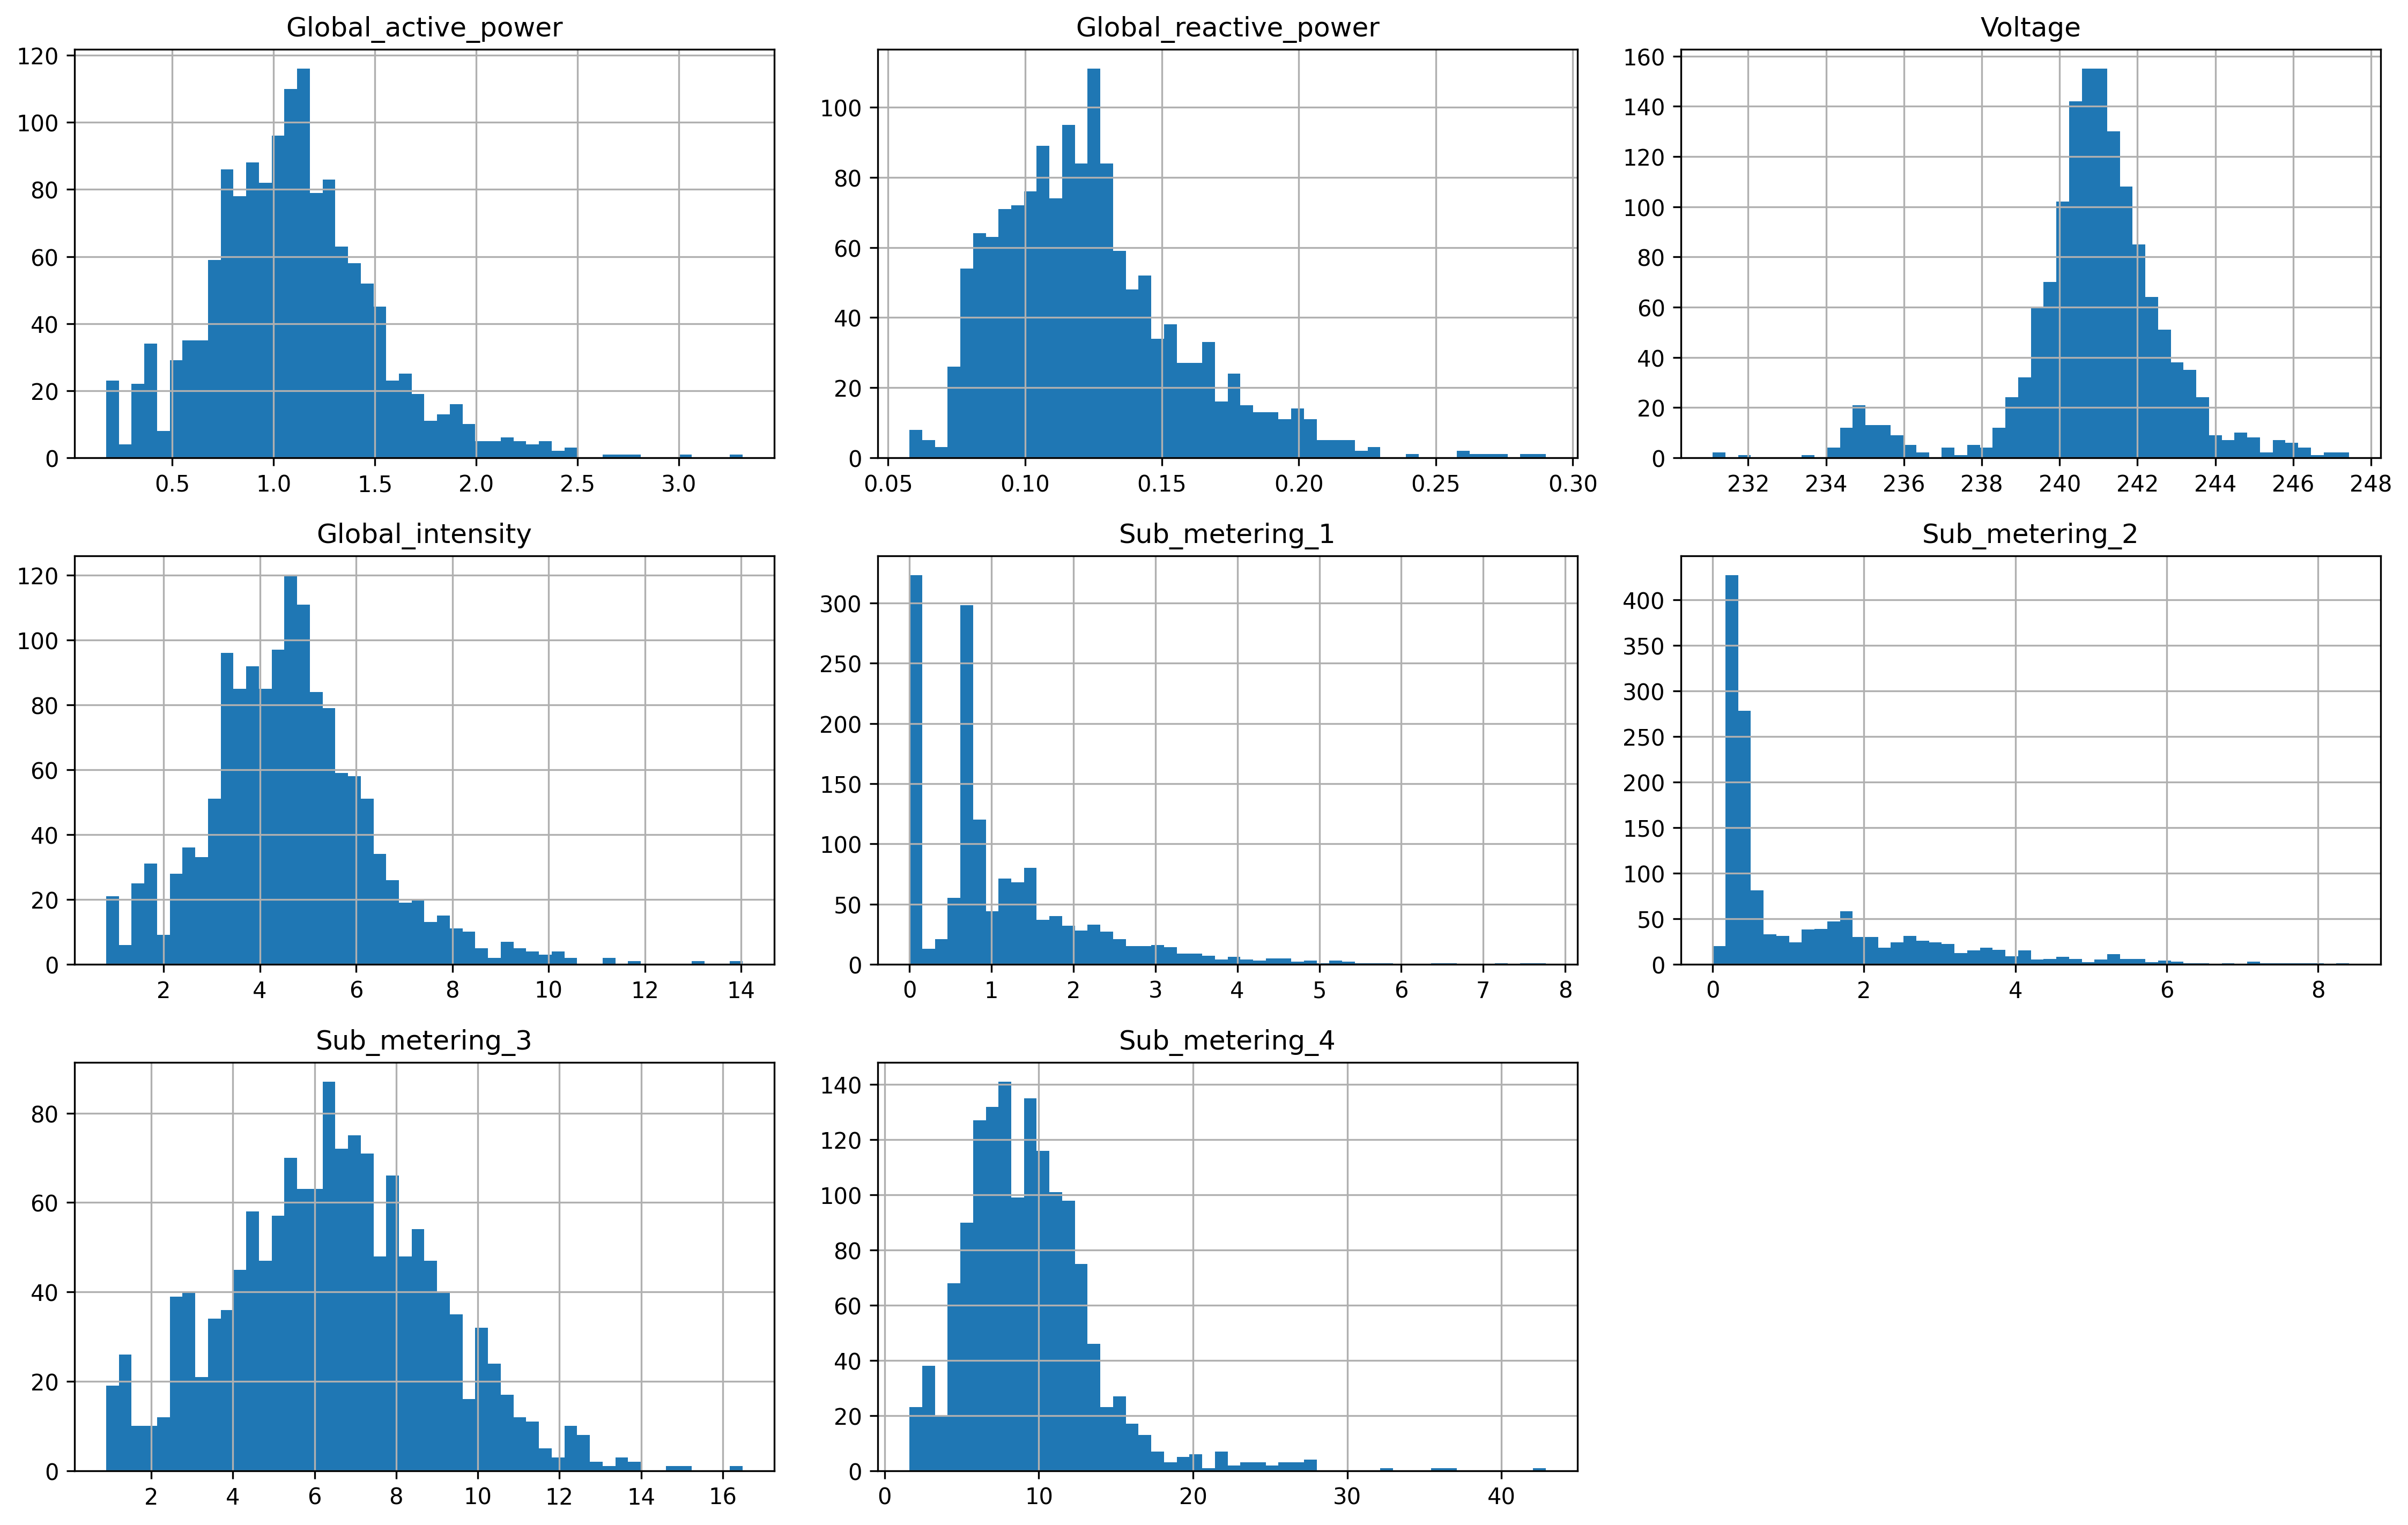

 

************************************************ Correlation Plot for Daily Resampled Data **************************************************



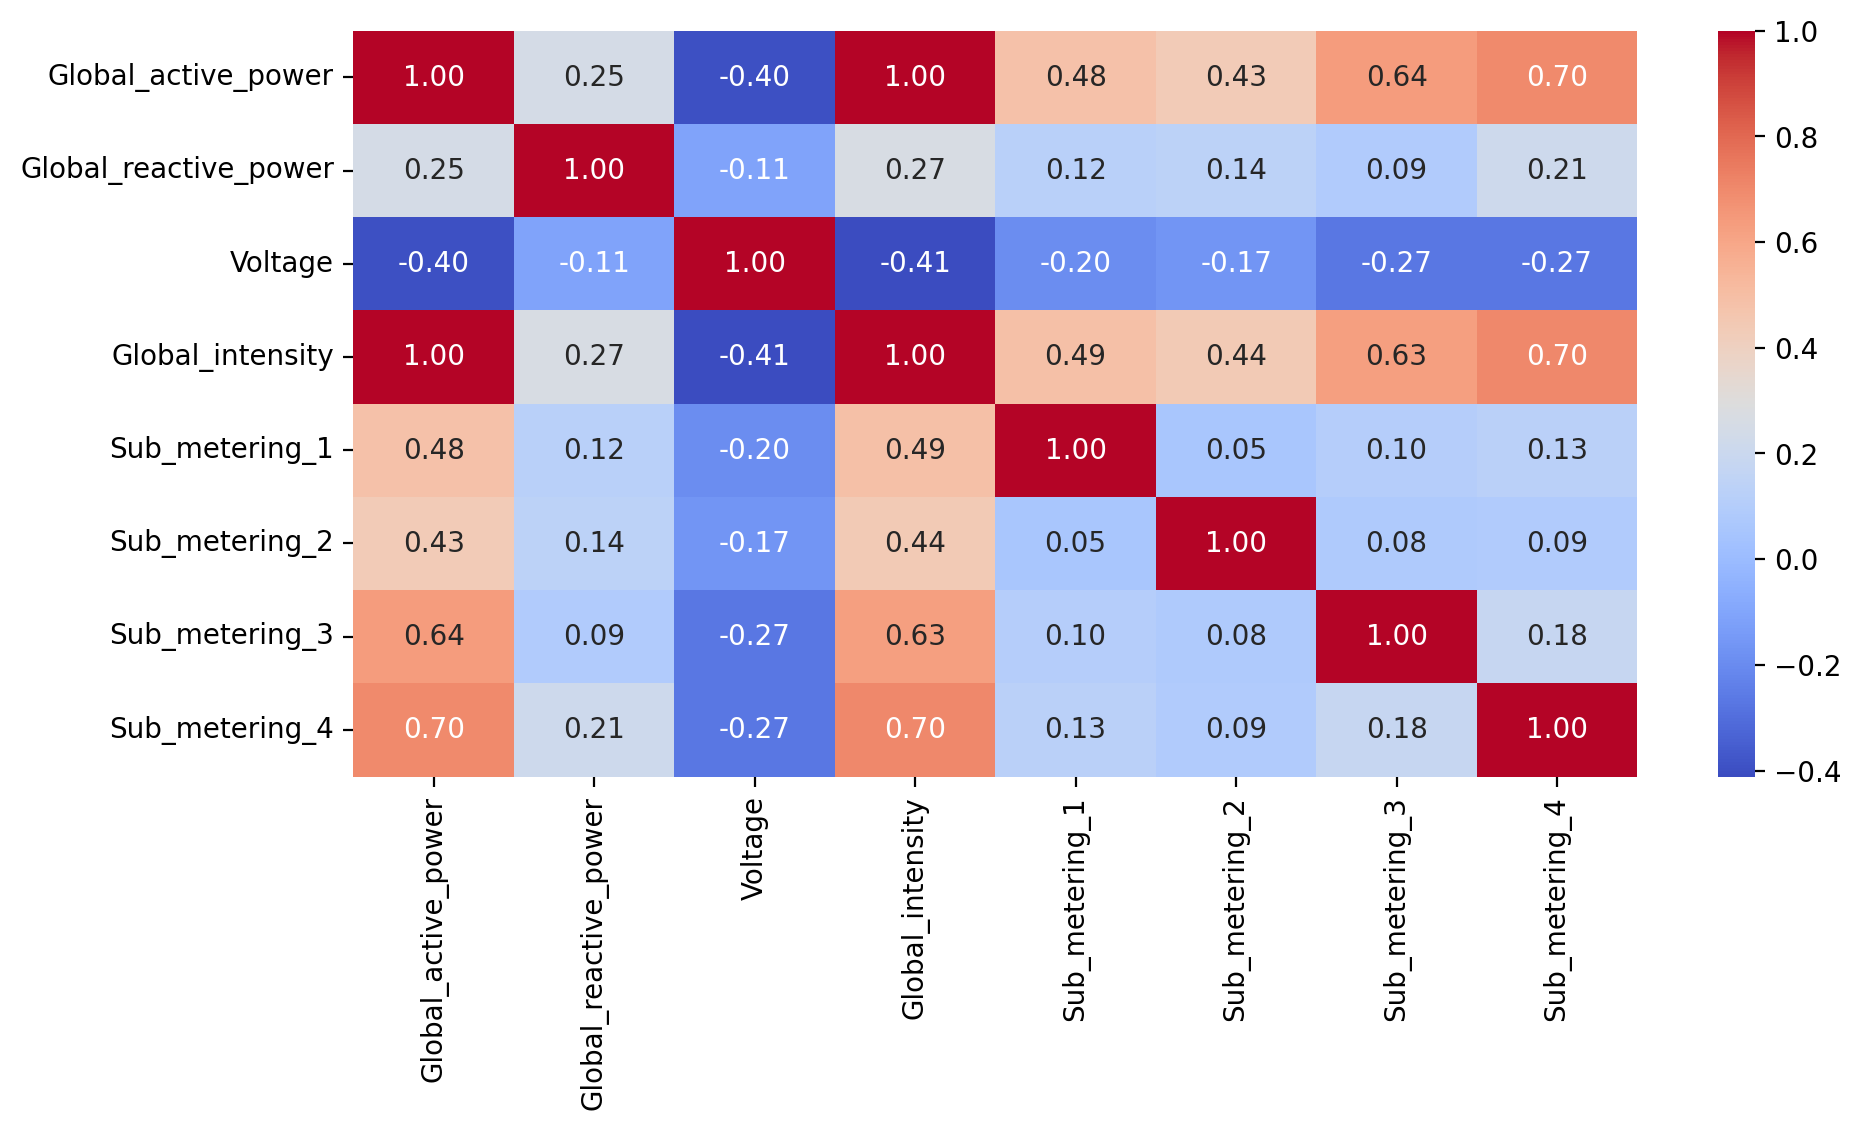

In [43]:
# Plot the visualization, distribution and correlation of Hourly resampled data
df_visu_dist_corr(df_imputed, "D", "Daily")

Note:- As Global_intensity and sub_metring_4 are highly correlated with Global_active_power so I am removing Global_intensity column

In [44]:
df2 = hourly_resampled.drop(['Global_intensity','Sub_metering_4'], axis=1)
df2

Global_active_power  Global_reactive_power     Voltage  \
date_time                                                                     
2006-12-16 17:00:00             4.222889               0.229000  234.643889   
2006-12-16 18:00:00             3.632200               0.080033  234.580167   
2006-12-16 19:00:00             3.400233               0.085233  233.232500   
2006-12-16 20:00:00             3.268567               0.075100  234.071500   
2006-12-16 21:00:00             3.056467               0.076667  237.158667   
...                                  ...                    ...         ...   
2010-11-26 17:00:00             1.725900               0.061400  237.069667   
2010-11-26 18:00:00             1.573467               0.053700  237.531833   
2010-11-26 19:00:00             1.659333               0.060033  236.741000   
2010-11-26 20:00:00             1.163700               0.061167  239.396000   
2010-11-26 21:00:00             0.934667               0.000000  239.690000   

                     Sub_metering_1  Sub_metering_2  Sub_metering_3  
date_time                                                            
2006-12-16 17:00:00             0.0        0.527778       16.861111  
2006-12-16 18:00:00             0.0        6.716667       16.866667  
2006-12-16 19:00:00             0.0        1.433333       16.683333  
2006-12-16 20:00:00             0.0        0.000000       16.783333  
2006-12-16 21:00:00             0.0        0.416667       17.216667  
...                             ...             ...             ...  
2010-11-26 17:00:00             0.0        0.000000       12.866667  
2010-11-26 18:00:00             0.0        0.000000        0.000000  
2010-11-26 19:00:00             0.0        0.066667        0.000000  
2010-11-26 20:00:00             0.0        1.066667        0.000000  
2010-11-26 21:00:00             0.0        0.000000        0.000000  

[34589 rows x 6 columns]

## Data Normalization

In [45]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_df = scaler.fit_transform(df2)

# Shape of scaled data
scaled_df

array([[0.63681623, 0.29573827, 0.33794529, 0.        , 0.01136636,
        0.78241815],
       [0.54504495, 0.10335773, 0.33550078, 0.        , 0.14465183,
        0.78267595],
       [0.50900588, 0.11007318, 0.28380167, 0.        , 0.03086863,
        0.7741686 ],
       ...,
       [0.2385342 , 0.07752906, 0.41839455, 0.        , 0.00143575,
        0.        ],
       [0.16153105, 0.07899268, 0.52024552, 0.        , 0.022972  ,
        0.        ],
       [0.12594772, 0.        , 0.53152393, 0.        , 0.        ,
        0.        ]])

## LSTM-1 optimizer=Adam epochs=50 batch_size=32 seq=7

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 100)                 │          42,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,901 (167.58 KB)

 Trainable params: 42,901 (167.58 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
757/757 - 4s - 6ms/step - loss: 0.0123 - val_loss: 0.0084
Epoch 2/50
757/757 - 6s - 8ms/step - loss: 0.0096 - val_loss: 0.0079
Epoch 3/50
757/757 - 3s - 5ms/step - loss: 0.0091 - val_loss: 0.0077
Epoch 4/50
757/757 - 5s - 6ms/step - loss: 0.0089 - val_loss: 0.0077
Epoch 5/50
757/757 - 5s - 6ms/step - loss: 0.0088 - val_loss: 0.0077
Epoch 6/50
757/757 - 4s - 6ms/step - loss: 0.0087 - val_loss: 0.0076
Epoch 7/50
757/757 - 5s - 6ms/step - loss: 0.0087 - val_loss: 0.0076
Epoch 8/50
757/757 - 5s - 6ms/step - loss: 0.0086 - val_loss: 0.0076
Epoch 9/50
757/757 - 3s - 4ms/step - loss: 0.0086 - val_loss: 0.0076
Epoch 10/50
757/757 - 3s - 4ms/step - loss: 0.0085 - val_loss: 0.0076
Epoch 11/50
757/757 - 6s - 7ms/step - loss: 0.0085 - val_loss: 0.0076


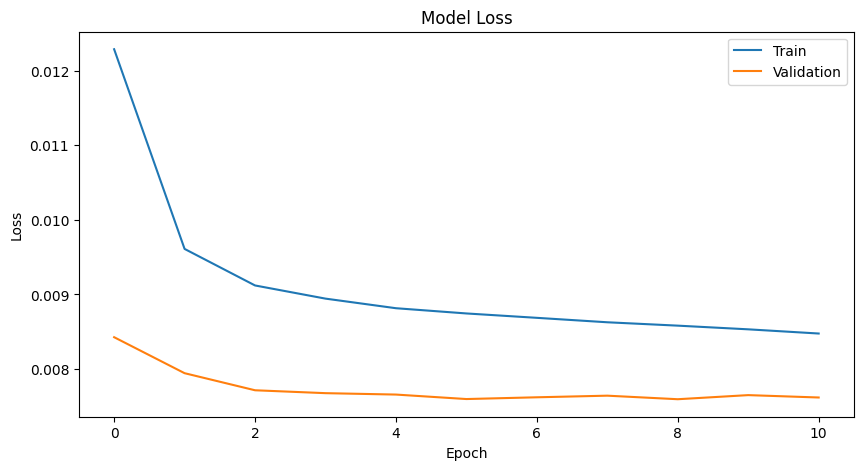

757/757 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
325/325 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Train Mean Absolute Error: 0.4438956139445378
Train Mean Squared Error: 0.38235909859290657
Train Root Mean Squared Error: 0.6183519213141547

Test Mean Absolute Error: 0.4027590049165993
Test Mean Squared Error: 0.31557744119735687
Test Root Mean Squared Error: 0.5617627979827045


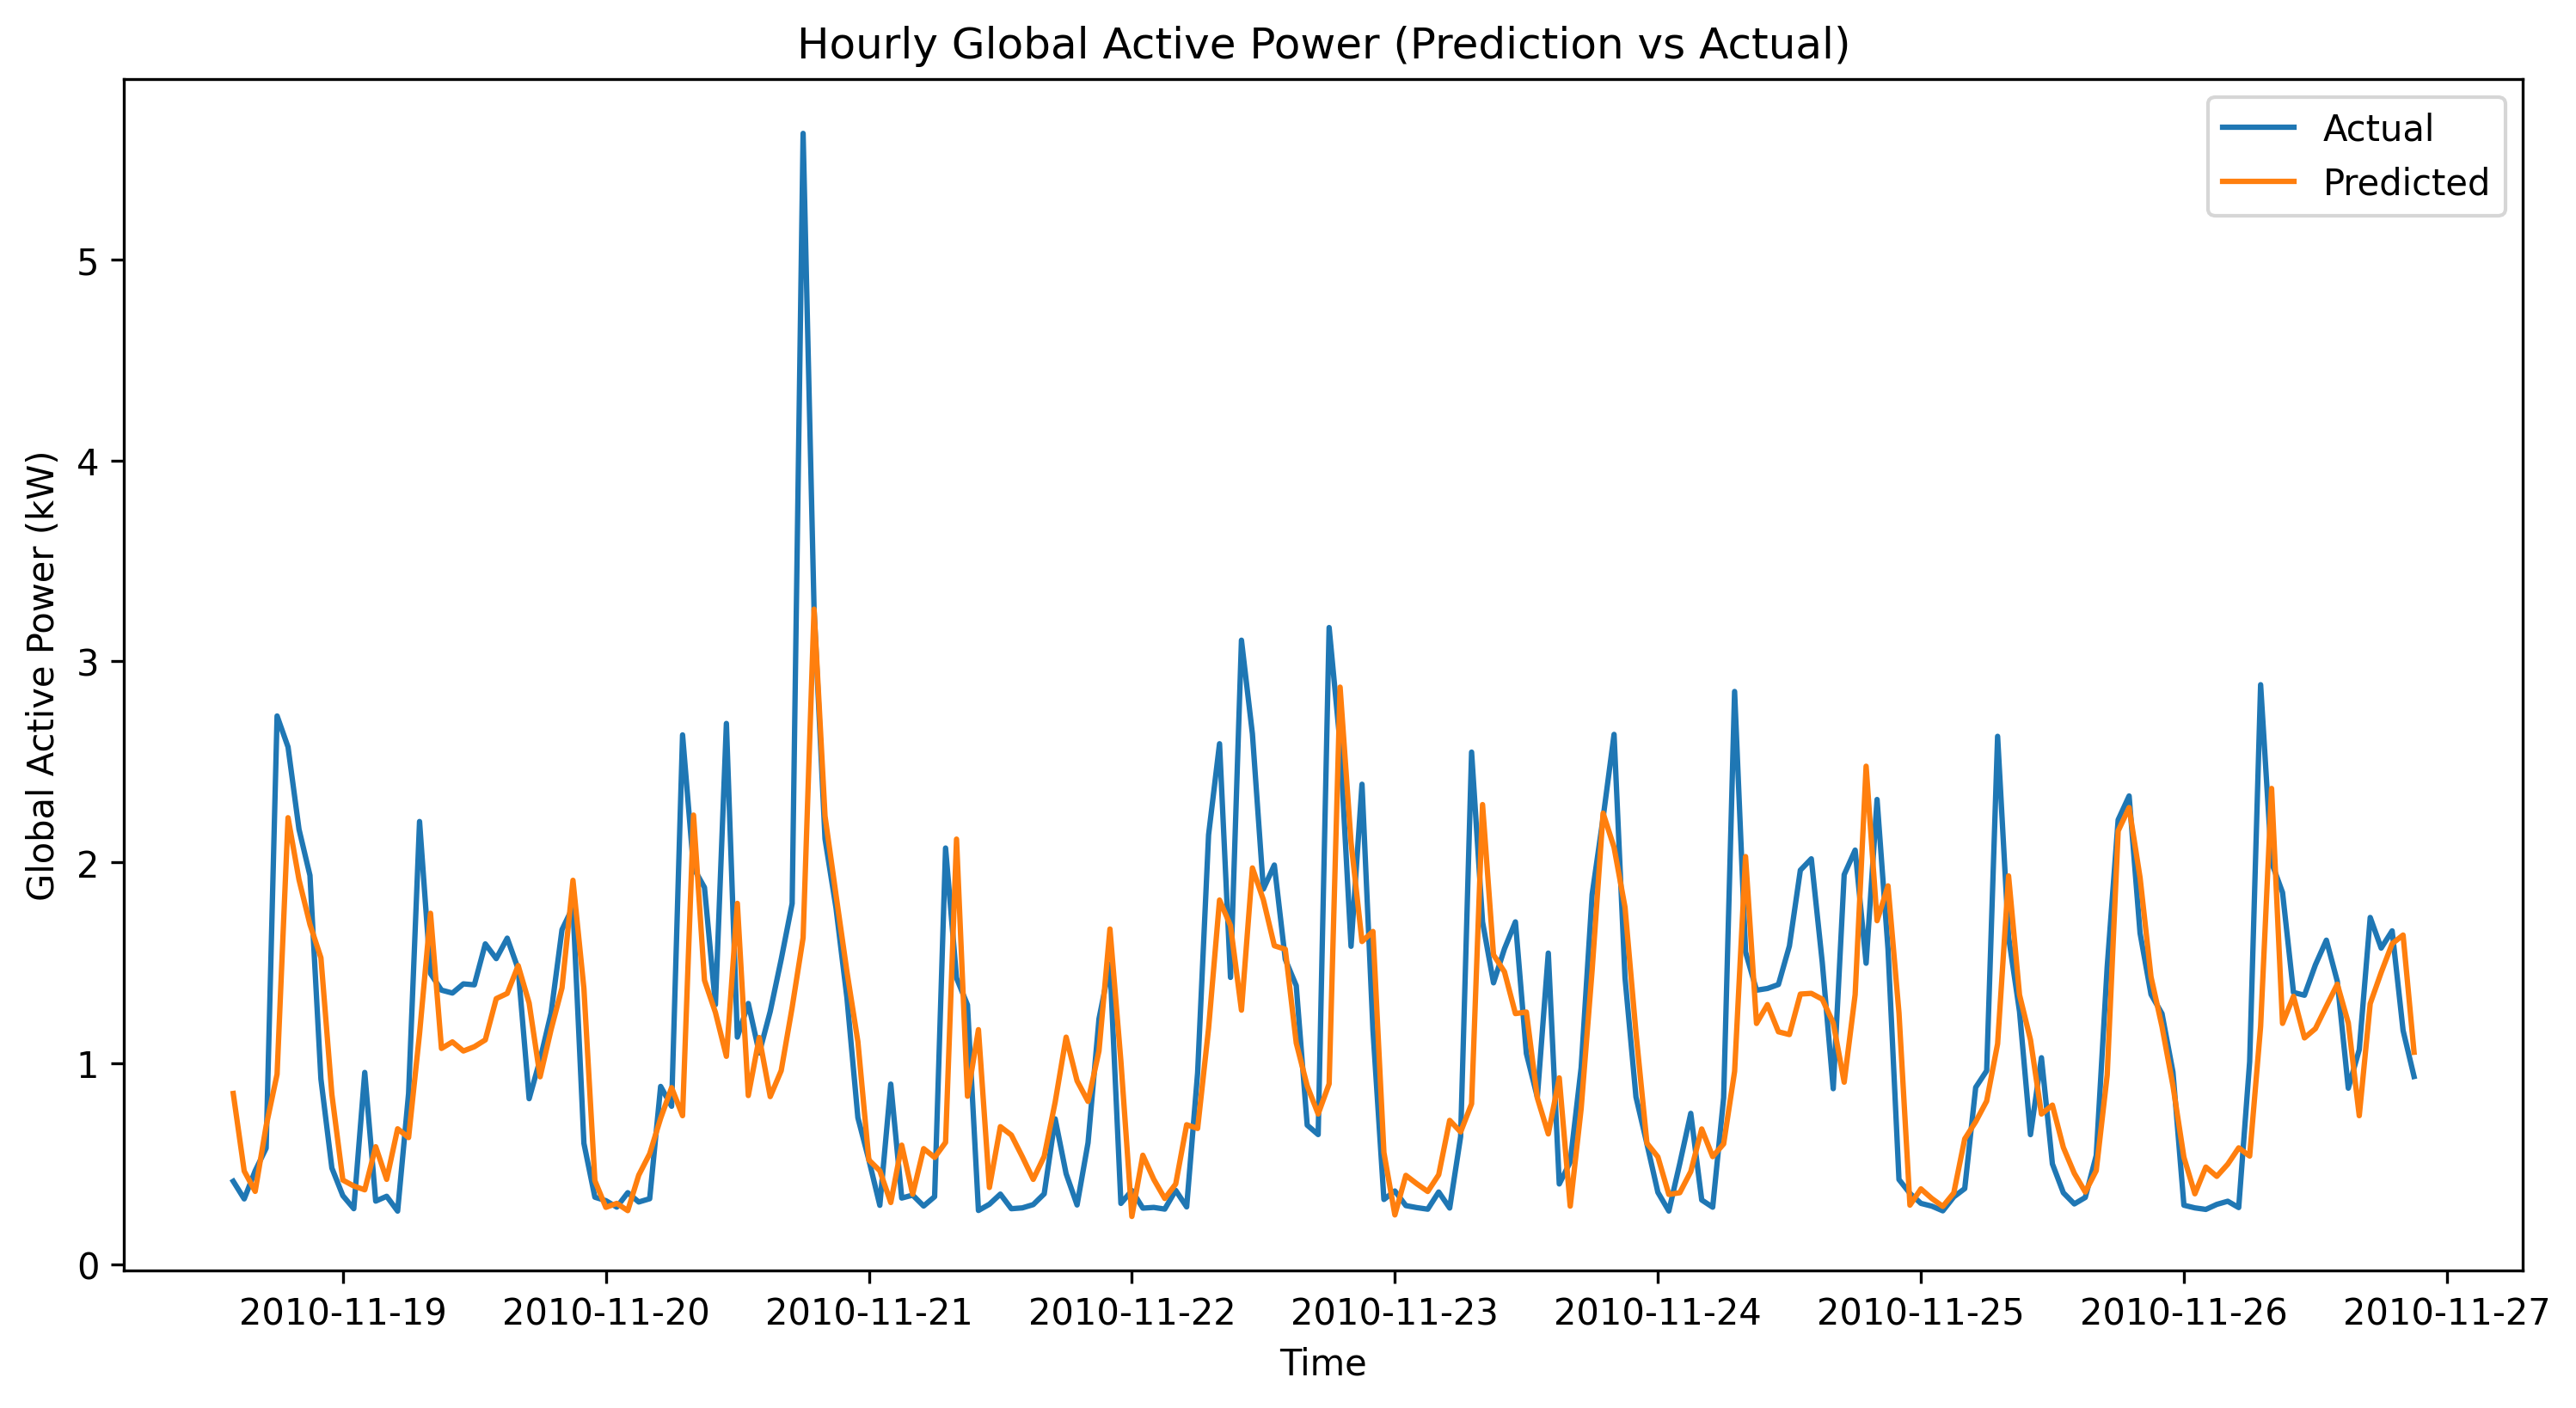

In [46]:
# Define sequence length and features
sequence_length = 7             # Number of time steps to consider in each sequence
num_features = len(df1.columns)  # Number of features

# Create sequences and corresponding labels
sequences = []
labels = []
for i in range(len(scaled_df) - sequence_length):
    seq = scaled_df[i:i+sequence_length]
    label = scaled_df[i+sequence_length][0]  # 'Global_Active_Power' column index
    sequences.append(seq)
    labels.append(label)

# Convert to numpy arrays
sequences = np.array(sequences)
labels = np.array(labels)

# Split into train and test sets
train_size = int(0.7 * len(sequences))
X_train, X_test = sequences[:train_size], sequences[train_size:]
y_train, y_test = labels[:train_size], labels[train_size:]

# Check the shape of Train & Test Split
X_train.shape, y_train.shape, X_test.shape, y_test.shape

# Create the LSTM model
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Displaying a summary of the model
model.summary()

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10 , min_delta=0.005)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test),
                    verbose=2, shuffle=False, callbacks=[early_stopping])

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Predict train and test data using the trained model
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Perform inverse transformation to rescale back to original range
# y_true values for train data
train_y_copies = np.repeat(y_train.reshape(-1, 1), X_train.shape[-1], axis=-1)
true_train_y = scaler.inverse_transform(train_y_copies)[:,0]

# predicted values for train data
train_prediction_copies = np.repeat(train_predict, df1.shape[-1], axis=-1)
pred_train_y = scaler.inverse_transform(train_prediction_copies)[:,0]

# y_true values for test data
test_y_copies = np.repeat(y_test.reshape(-1, 1), X_test.shape[-1], axis=-1)
true_test_y = scaler.inverse_transform(test_y_copies)[:,0]

# predicted values for test data
test_prediction_copies = np.repeat(test_predict, df1.shape[-1], axis=-1)
pred_test_y = scaler.inverse_transform(test_prediction_copies)[:,0]

# Calculate evaluation metrics
print('Train Mean Absolute Error:', mean_absolute_error(true_train_y, pred_train_y))
print('Train Mean Squared Error:', mean_squared_error(true_train_y, pred_train_y))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(true_train_y, pred_train_y)))

print('\nTest Mean Absolute Error:', mean_absolute_error(true_test_y, pred_test_y))
print('Test Mean Squared Error:', mean_squared_error(true_test_y, pred_test_y))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(true_test_y, pred_test_y)))

# Plotting predicted and actual temperatures
plt.figure(figsize=(12, 6), dpi=300)
plt.plot(df1.index[-200:], true_test_y[-200:], label='Actual')
plt.plot(df1.index[-200:], pred_test_y[-200:], label='Predicted')
plt.title('Hourly Global Active Power (Prediction vs Actual)')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.show()

## LSTM-2 optimizer=SGD epochs=50 batch_size=32 seq=7

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 100)                 │          42,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,901 (167.58 KB)

 Trainable params: 42,901 (167.58 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
757/757 - 3s - 4ms/step - loss: 0.0189 - val_loss: 0.0140
Epoch 2/50
757/757 - 6s - 8ms/step - loss: 0.0169 - val_loss: 0.0134
Epoch 3/50
757/757 - 3s - 4ms/step - loss: 0.0160 - val_loss: 0.0130
Epoch 4/50
757/757 - 3s - 3ms/step - loss: 0.0153 - val_loss: 0.0126
Epoch 5/50
757/757 - 3s - 3ms/step - loss: 0.0148 - val_loss: 0.0126
Epoch 6/50
757/757 - 3s - 4ms/step - loss: 0.0144 - val_loss: 0.0123


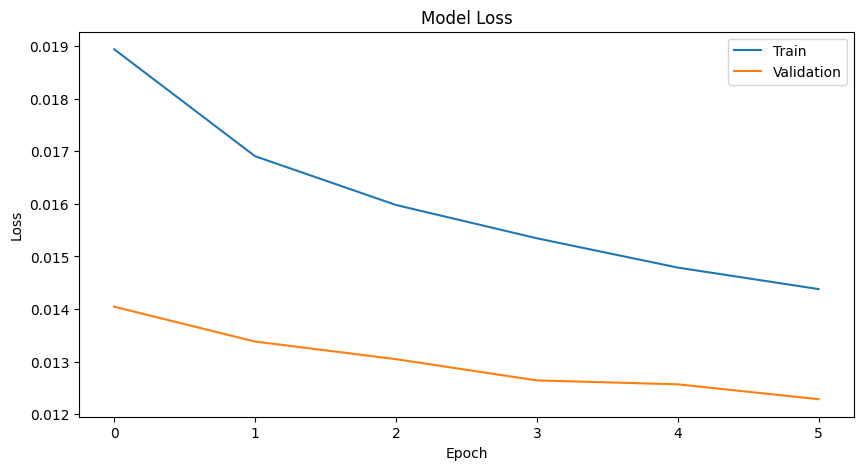

757/757 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Train Mean Absolute Error: 0.5783068496614405
Train Mean Squared Error: 0.6474570515627679
Train Root Mean Squared Error: 0.8046471596686139

Test Mean Absolute Error: 0.5145865849234732
Test Mean Squared Error: 0.508977573667796
Test Root Mean Squared Error: 0.7134266421068083


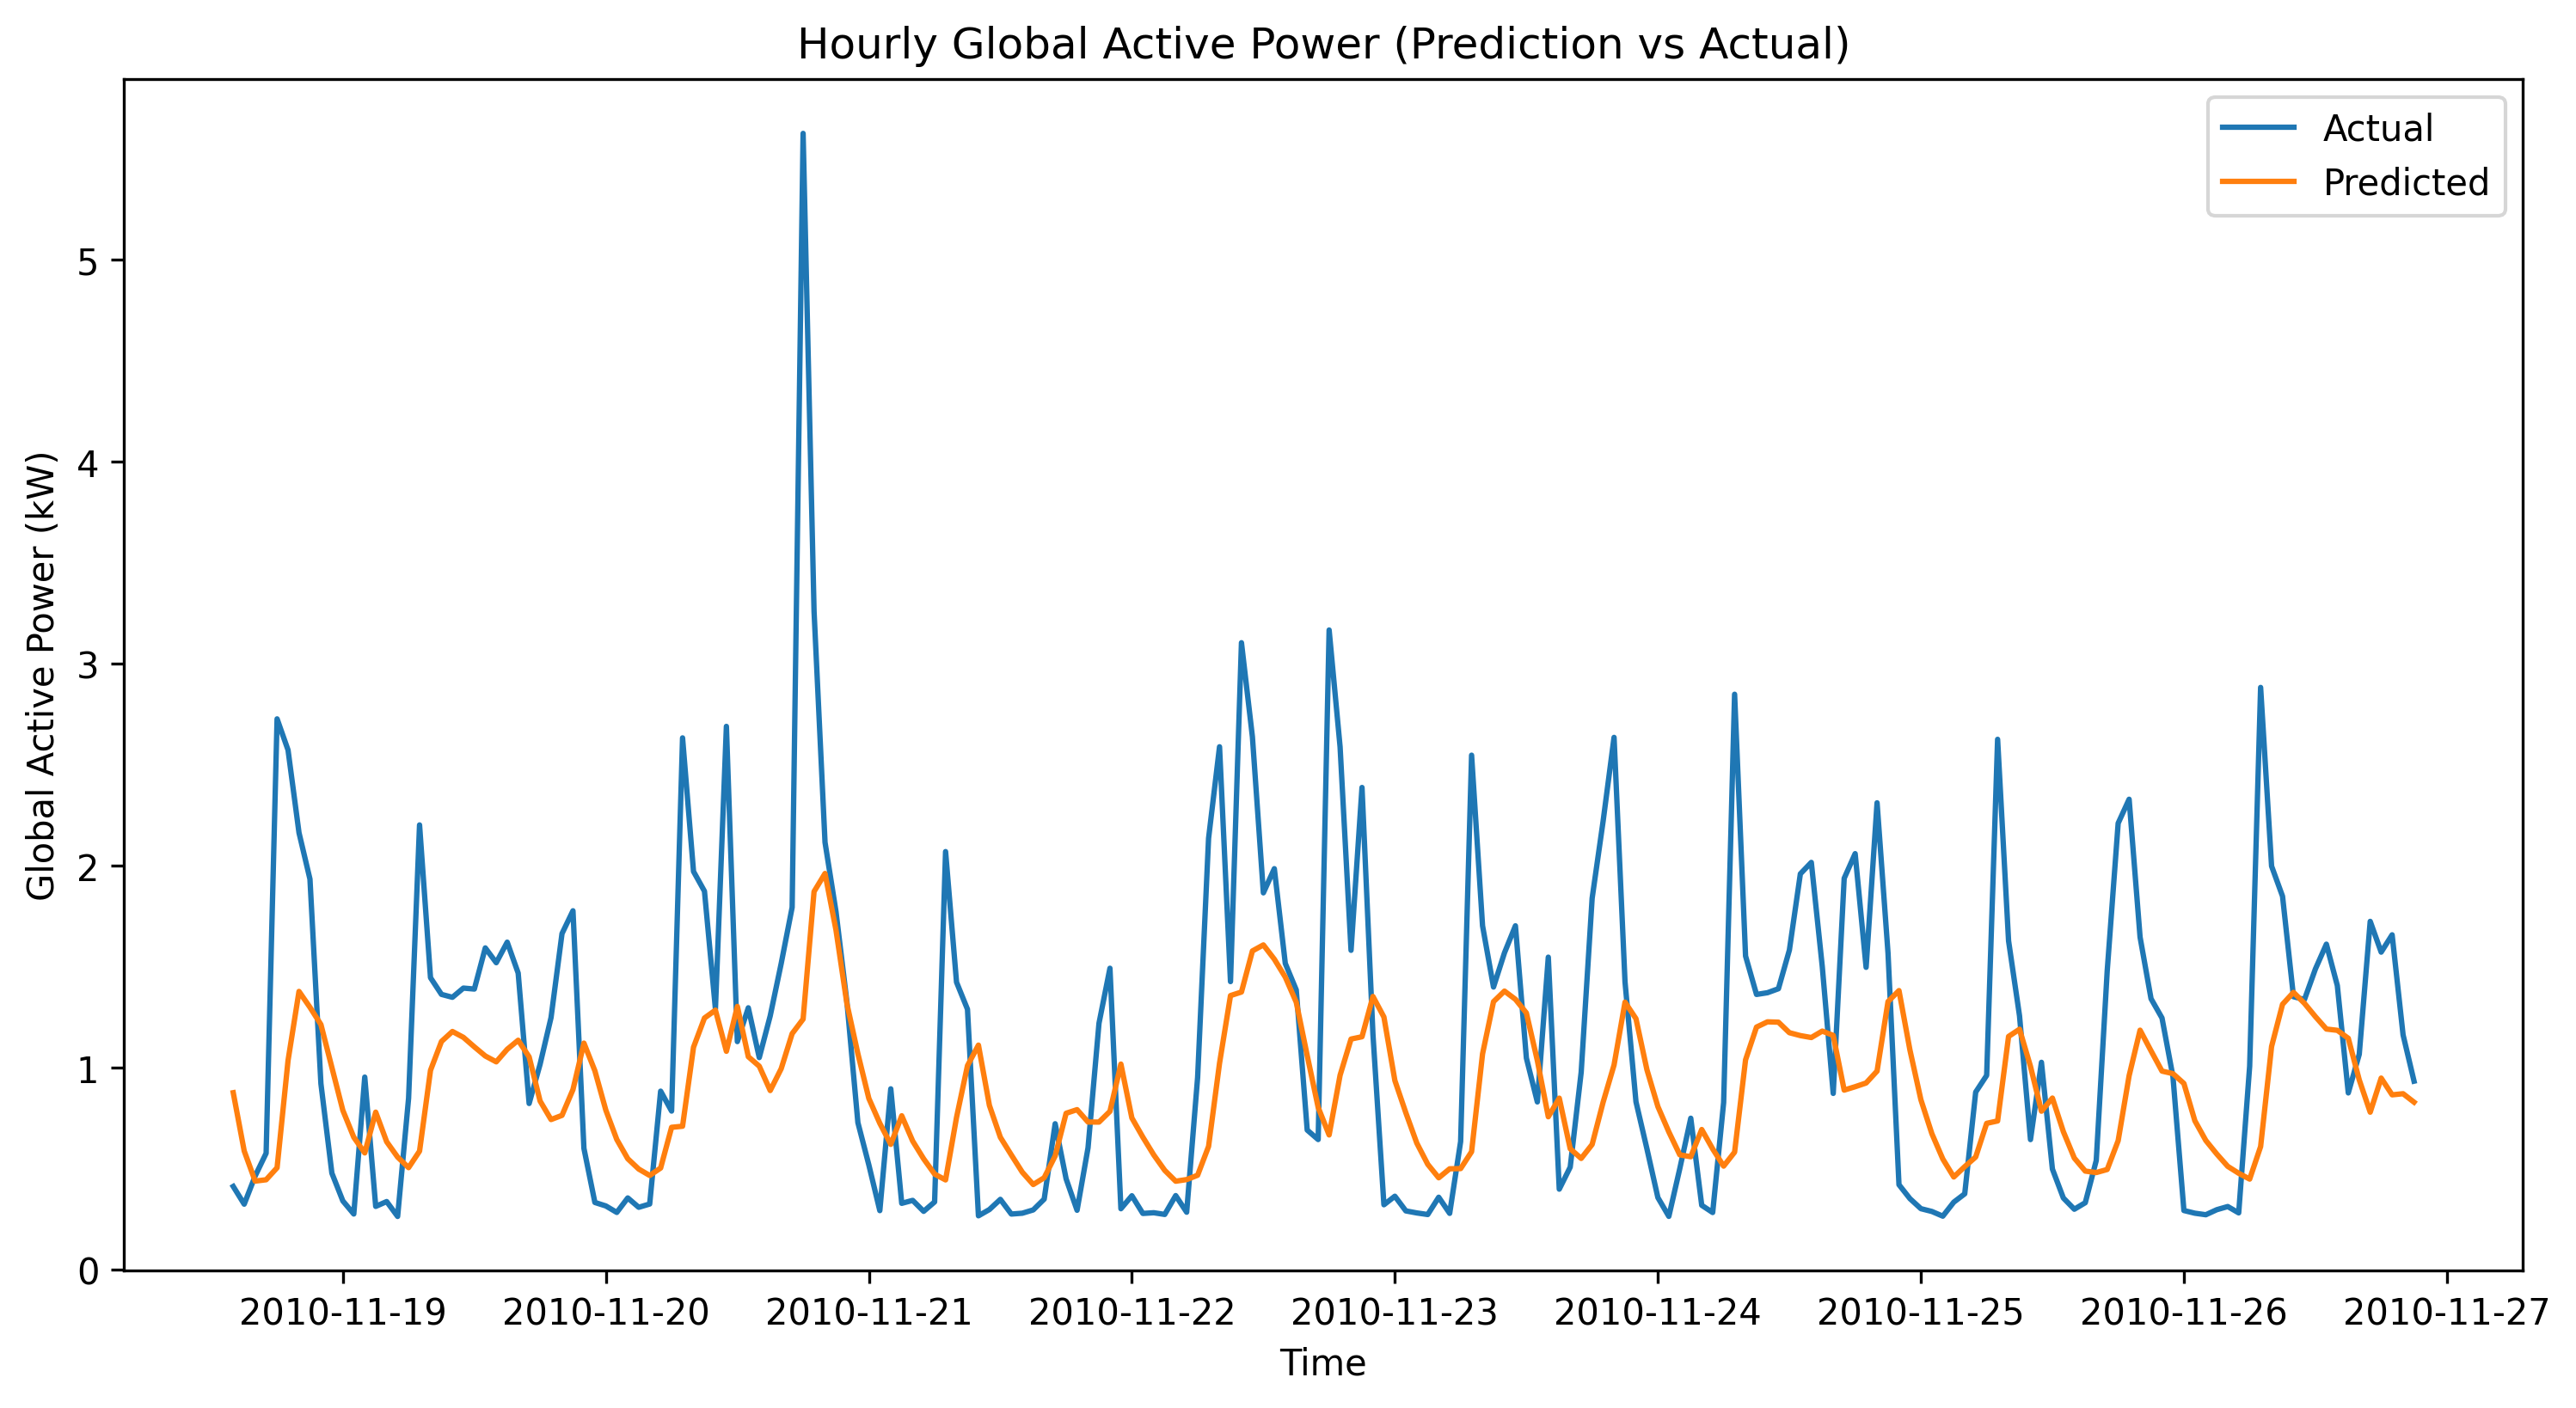

In [47]:
# Define sequence length and features
sequence_length = 7             # Number of time steps to consider in each sequence
num_features = len(df1.columns)  # Number of features

# Create sequences and corresponding labels
sequences = []
labels = []
for i in range(len(scaled_df) - sequence_length):
    seq = scaled_df[i:i+sequence_length]
    label = scaled_df[i+sequence_length][0]  # 'Global_Active_Power' column index
    sequences.append(seq)
    labels.append(label)

# Convert to numpy arrays
sequences = np.array(sequences)
labels = np.array(labels)

# Split into train and test sets
train_size = int(0.7 * len(sequences))
X_train, X_test = sequences[:train_size], sequences[train_size:]
y_train, y_test = labels[:train_size], labels[train_size:]

# Check the shape of Train & Test Split
X_train.shape, y_train.shape, X_test.shape, y_test.shape

# Create the LSTM model
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=SGD(), loss='mean_squared_error')

# Displaying a summary of the model
model.summary()

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5 , min_delta=0.005)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test),
                    verbose=2, shuffle=False, callbacks=[early_stopping])

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Predict train and test data using the trained model
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Perform inverse transformation to rescale back to original range
# y_true values for train data
train_y_copies = np.repeat(y_train.reshape(-1, 1), X_train.shape[-1], axis=-1)
true_train_y = scaler.inverse_transform(train_y_copies)[:,0]

# predicted values for train data
train_prediction_copies = np.repeat(train_predict, df1.shape[-1], axis=-1)
pred_train_y = scaler.inverse_transform(train_prediction_copies)[:,0]

# y_true values for test data
test_y_copies = np.repeat(y_test.reshape(-1, 1), X_test.shape[-1], axis=-1)
true_test_y = scaler.inverse_transform(test_y_copies)[:,0]

# predicted values for test data
test_prediction_copies = np.repeat(test_predict, df1.shape[-1], axis=-1)
pred_test_y = scaler.inverse_transform(test_prediction_copies)[:,0]

# Calculate evaluation metrics
print('Train Mean Absolute Error:', mean_absolute_error(true_train_y, pred_train_y))
print('Train Mean Squared Error:', mean_squared_error(true_train_y, pred_train_y))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(true_train_y, pred_train_y)))

print('\nTest Mean Absolute Error:', mean_absolute_error(true_test_y, pred_test_y))
print('Test Mean Squared Error:', mean_squared_error(true_test_y, pred_test_y))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(true_test_y, pred_test_y)))

# Plotting predicted and actual temperatures
plt.figure(figsize=(12, 6), dpi=300)
plt.plot(df1.index[-200:], true_test_y[-200:], label='Actual')
plt.plot(df1.index[-200:], pred_test_y[-200:], label='Predicted')
plt.title('Hourly Global Active Power (Prediction vs Actual)')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.show()

## LSTM-3 optimizer=RMSprop epochs=50 batch_size=32 seq=7

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100)                 │          42,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,901 (167.58 KB)

 Trainable params: 42,901 (167.58 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
757/757 - 4s - 5ms/step - loss: 0.0126 - val_loss: 0.0086
Epoch 2/50
757/757 - 3s - 4ms/step - loss: 0.0097 - val_loss: 0.0081
Epoch 3/50
757/757 - 7s - 9ms/step - loss: 0.0092 - val_loss: 0.0079
Epoch 4/50
757/757 - 3s - 4ms/step - loss: 0.0091 - val_loss: 0.0078
Epoch 5/50
757/757 - 3s - 4ms/step - loss: 0.0090 - val_loss: 0.0077
Epoch 6/50
757/757 - 6s - 7ms/step - loss: 0.0090 - val_loss: 0.0077


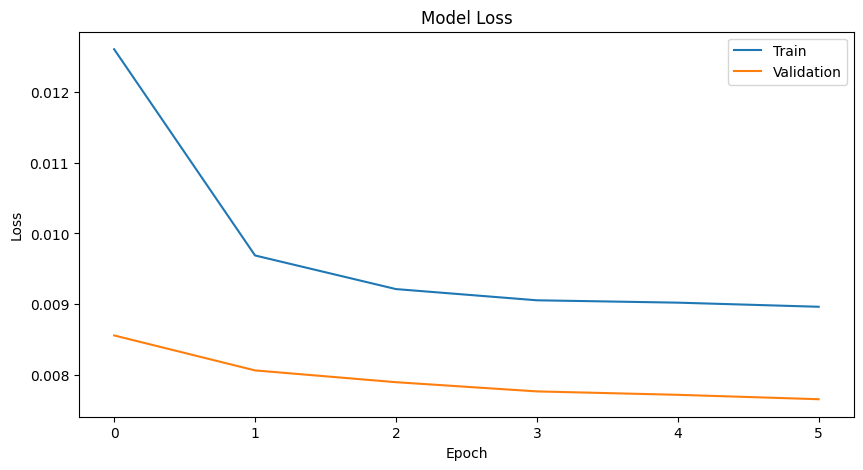

757/757 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
325/325 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Train Mean Absolute Error: 0.47405521575919973
Train Mean Squared Error: 0.4015042445173491
Train Root Mean Squared Error: 0.6336436258002989

Test Mean Absolute Error: 0.41823656978924334
Test Mean Squared Error: 0.31702859315489434
Test Root Mean Squared Error: 0.5630529221617576


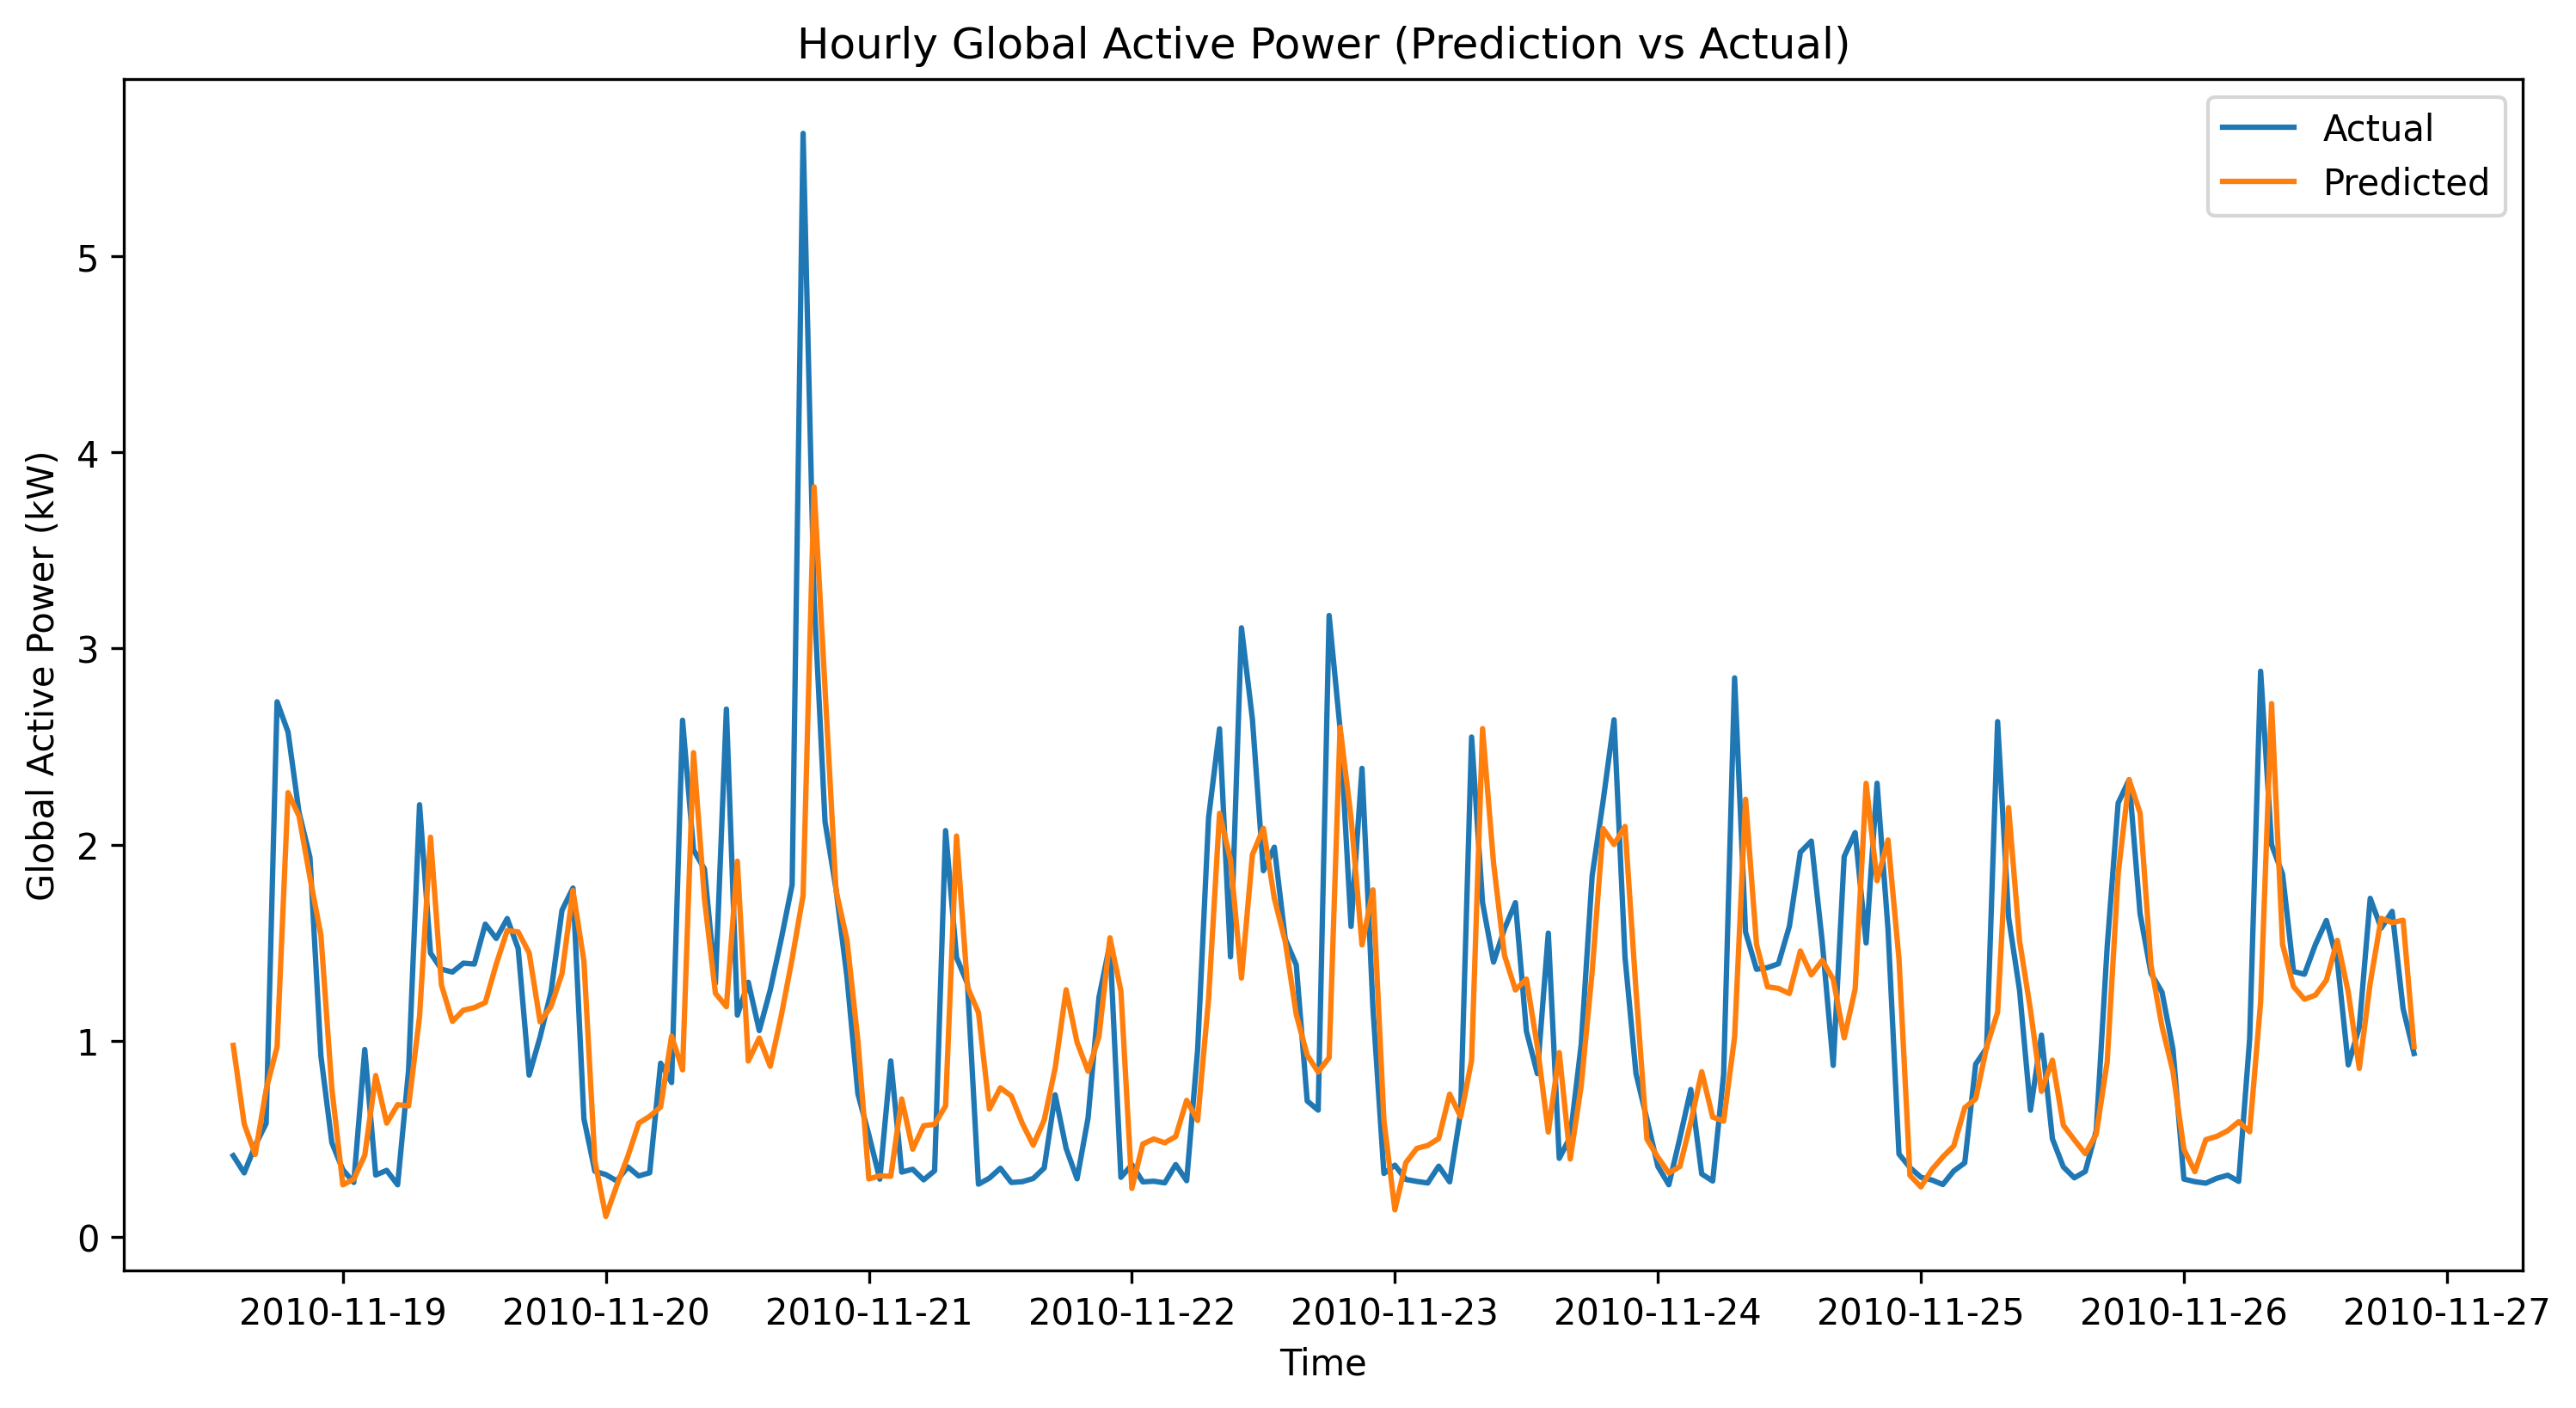

In [48]:
# Define sequence length and features
sequence_length = 7             # Number of time steps to consider in each sequence
num_features = len(df1.columns)  # Number of features

# Create sequences and corresponding labels
sequences = []
labels = []
for i in range(len(scaled_df) - sequence_length):
    seq = scaled_df[i:i+sequence_length]
    label = scaled_df[i+sequence_length][0]  # 'Global_Active_Power' column index
    sequences.append(seq)
    labels.append(label)

# Convert to numpy arrays
sequences = np.array(sequences)
labels = np.array(labels)

# Split into train and test sets
train_size = int(0.7 * len(sequences))
X_train, X_test = sequences[:train_size], sequences[train_size:]
y_train, y_test = labels[:train_size], labels[train_size:]

# Check the shape of Train & Test Split
X_train.shape, y_train.shape, X_test.shape, y_test.shape

# Create the LSTM model
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=RMSprop(), loss='mean_squared_error')

# Displaying a summary of the model
model.summary()

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5 , min_delta=0.005)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test),
                    verbose=2, shuffle=False, callbacks=[early_stopping])

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Predict train and test data using the trained model
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Perform inverse transformation to rescale back to original range
# y_true values for train data
train_y_copies = np.repeat(y_train.reshape(-1, 1), X_train.shape[-1], axis=-1)
true_train_y = scaler.inverse_transform(train_y_copies)[:,0]

# predicted values for train data
train_prediction_copies = np.repeat(train_predict, df1.shape[-1], axis=-1)
pred_train_y = scaler.inverse_transform(train_prediction_copies)[:,0]

# y_true values for test data
test_y_copies = np.repeat(y_test.reshape(-1, 1), X_test.shape[-1], axis=-1)
true_test_y = scaler.inverse_transform(test_y_copies)[:,0]

# predicted values for test data
test_prediction_copies = np.repeat(test_predict, df1.shape[-1], axis=-1)
pred_test_y = scaler.inverse_transform(test_prediction_copies)[:,0]

# Calculate evaluation metrics
print('Train Mean Absolute Error:', mean_absolute_error(true_train_y, pred_train_y))
print('Train Mean Squared Error:', mean_squared_error(true_train_y, pred_train_y))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(true_train_y, pred_train_y)))

print('\nTest Mean Absolute Error:', mean_absolute_error(true_test_y, pred_test_y))
print('Test Mean Squared Error:', mean_squared_error(true_test_y, pred_test_y))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(true_test_y, pred_test_y)))

# Plotting predicted and actual temperatures
plt.figure(figsize=(12, 6), dpi=300)
plt.plot(df1.index[-200:], true_test_y[-200:], label='Actual')
plt.plot(df1.index[-200:], pred_test_y[-200:], label='Predicted')
plt.title('Hourly Global Active Power (Prediction vs Actual)')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.show()